# Lab 3: Red Hat Validated Models and Model Catelog

### Recap:
In the previous exercises we:
- Demonstrated how Red Hat AI Inference Server (`vLLM`) increases model performance.  
- Optimised an open source model from huggingface by quantising it to improve memory efficiency without sacrificing accuracy.  


## Validated and Trusted Models

With the growing number of large language models (LLMs), inference server configurations, and hardware accelerator options available, it is important to evaluate the right combination for your needs. This ensures an optimal balance between trust, performance, accuracy, and cost for your specific use case.

To support this, Red Hat AI provides access to a repository of third-party models that are not only validated to run efficiently on the platform, but are also verified to come from known, trusted sources.

These leading third-party models undergo capacity planning scenarios, helping you make informed decisions about the best combination of model, deployment settings, and hardware accelerator for your domain-specific use cases.

### Red Hat AI repository on HuggingFace

1. Click this link (**[Red Hat AI on Huggingface](https://huggingface.co/RedHatAI)**) to explore the Red Hat AI Hugging Face repository.  

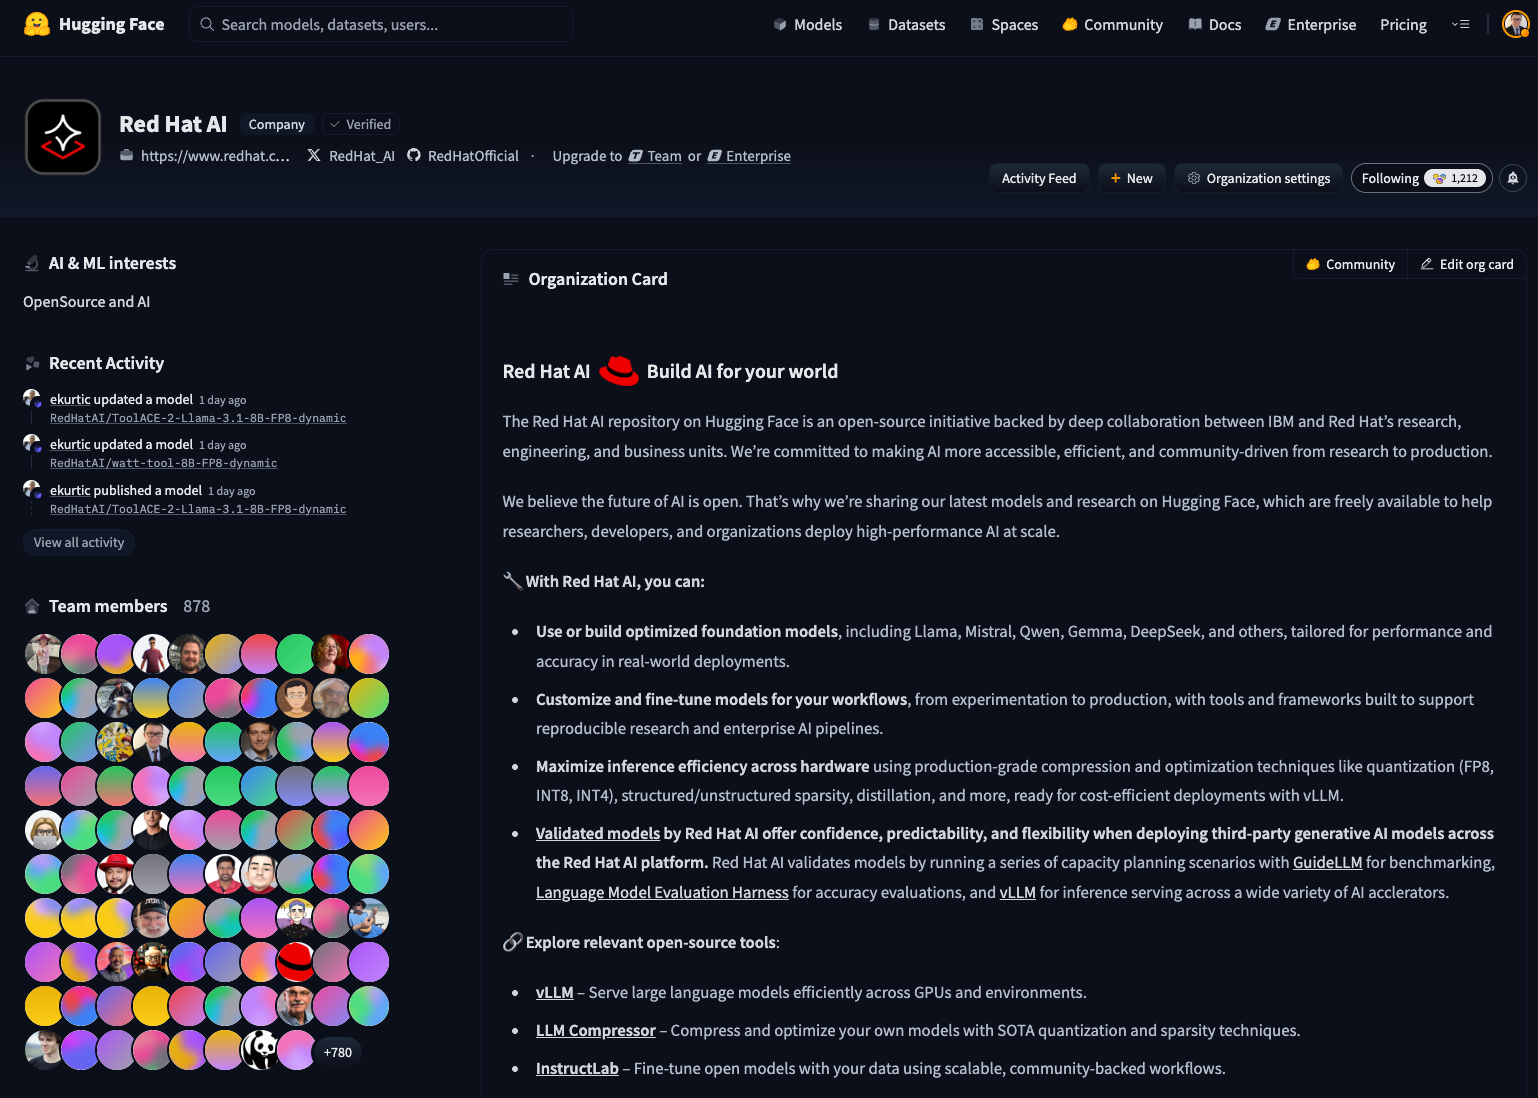  

### Features and Benefits

- **Increase flexibility** – Access a collection of validated and optimised models—hosted on Hugging Face—ready for inference. Reduce time to value, promote consistency, and improve the reliability of your AI applications.
- **Optimised inference** – Optimise your AI infrastructure by selecting the right model, deployment settings, and hardware accelerators for a cost-effective and efficient deployment aligned with your enterprise use cases.
- **Improved confidence** – Leverage industry benchmarks, accuracy evaluations, and model optimisation tools to evaluate, compress, and validate third-party models across various deployment scenarios.

### Validated Models

These aren’t just any LLMs. Red Hat has tested third-party models using realistic scenarios to understand how they perform in real-world environments. Specialised tools are used to assess LLM performance across a range of hardware configurations.

- **GuideLLM** – Evaluates performance and cost across different hardware setups.
- **LM Evaluation Harness** – Tests model generalisation across a variety of tasks.

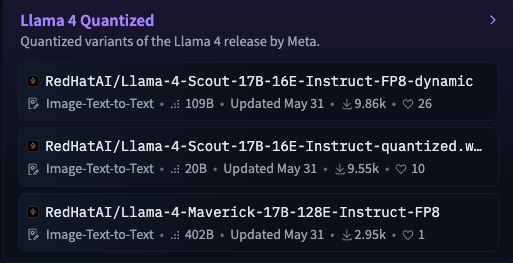

- **Evaluation and Recovery of Accuracy** – For each quantised model, Red Hat publishes detailed accuracy evaluation results alongside methods used to recover or preserve model accuracy after quantisation. This ensures that performance gains from compression do not come at the expense of model quality, helping you make informed trade-offs between efficiency and accuracy.


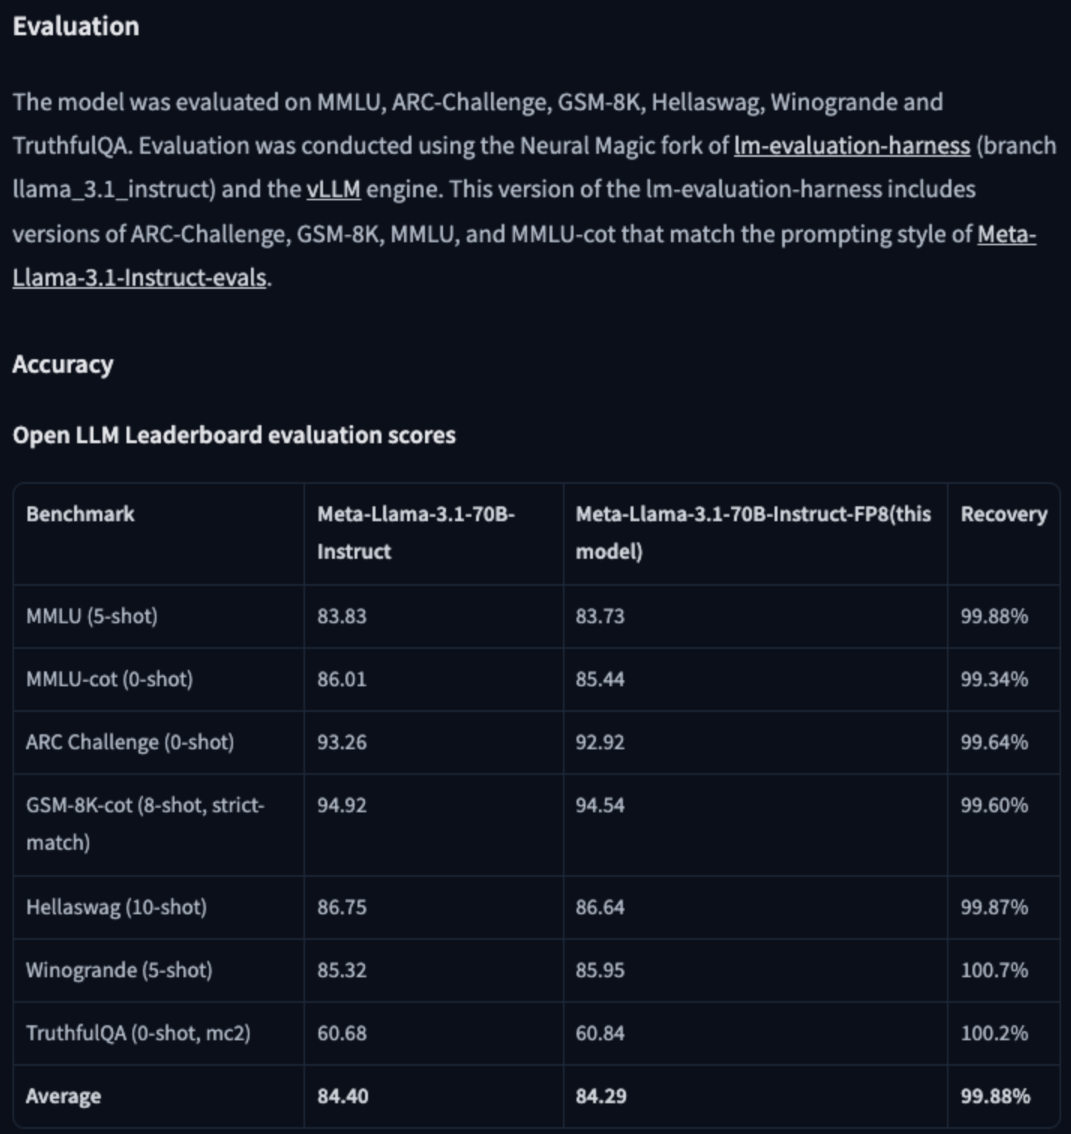

## Deploying models with Red Hat OpenShift AI

Generally, managing models in production environments will leverage some trusted internal storage - typically **S3-compatible storage**.  
The workflow involves steps such as: The AI/Data team will push the pretrained models into S3 bucket, then operations team builds up a data pipeline to pull the model and serve it using the built-in serving runtime.


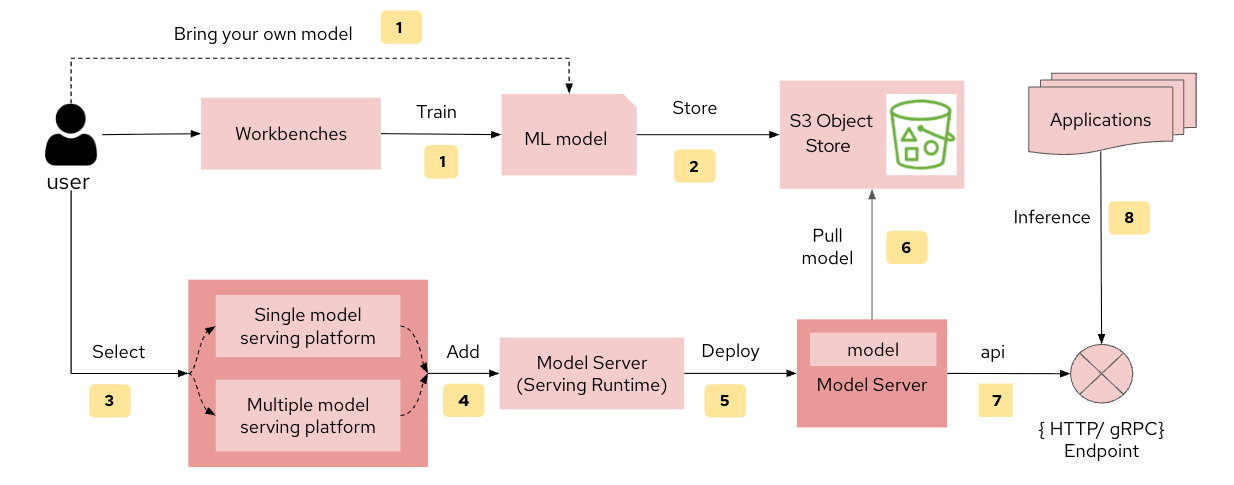

When it comes to serving a model, Red Hat OpenShift AI provides a variety of serving runtimes out of the box (**vLLM**, **OpenVINO**, **Caikit**, **LlamaCPP**, and more).  
The following screenshot illustrates the out of the box model serving options:

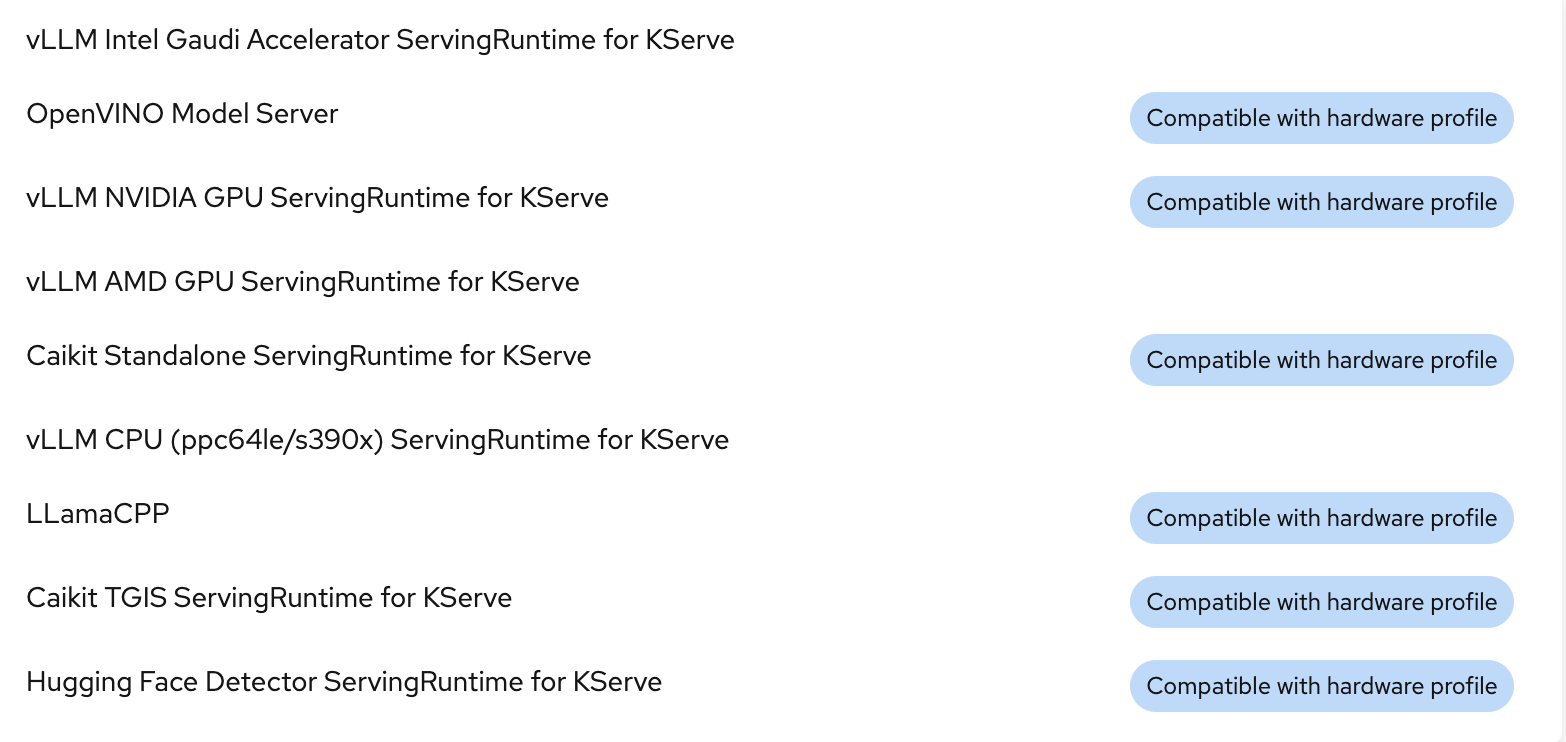


💁🏼 If you need a different serving runtime then Red Hat OpenShift AI provides features to add your own.  

### 🏆 A Modern way - KServe Modelcar approach

#### Evolving Beyond S3 for Model Storage

While S3 has traditionally been used to store models, it presents several limitations that create challenges for operations teams managing production AI systems:

- Lack of model version control  
- Complex access control  
- Operational overhead  
- Latency and performance concerns  
- No metadata or lineage tracking  

Newer approaches now extend the benefits of container repositories to model storage, addressing these limitations. One such solution is **ModelCar**.

**ModelCar** is not a new format for models. Instead, it acts as a wrapper around a model in its native format (such as PyTorch, ONNX, or TensorFlow), enabling the use of container-native tools for moving, versioning, and loading models quickly and efficiently.

By using an OCI-compliant layout, ModelCar allows models to be stored in standard container registries and benefits from:

- **Improved version control** – Treat models like code artifacts with clear versioning and immutability.  
- **Simplified access control** – Leverage existing container registry security models for authentication and authorisation.  
- **Operational consistency** – Align model distribution with existing CI/CD and DevSecOps practices.  
- **Better traceability** – Embed metadata such as training provenance, evaluation scores, and deployment history directly within the model artifact.  
- **Faster deployment** – Take advantage of optimised distribution mechanisms like layer caching and delta updates.  


Red Hat OpenShift AI (since v2.14) enables the ability of serving models directly from a **container** registry using **ModelCar**. Users are also able to deploy a ModelCar-based model directly from the dashboard.

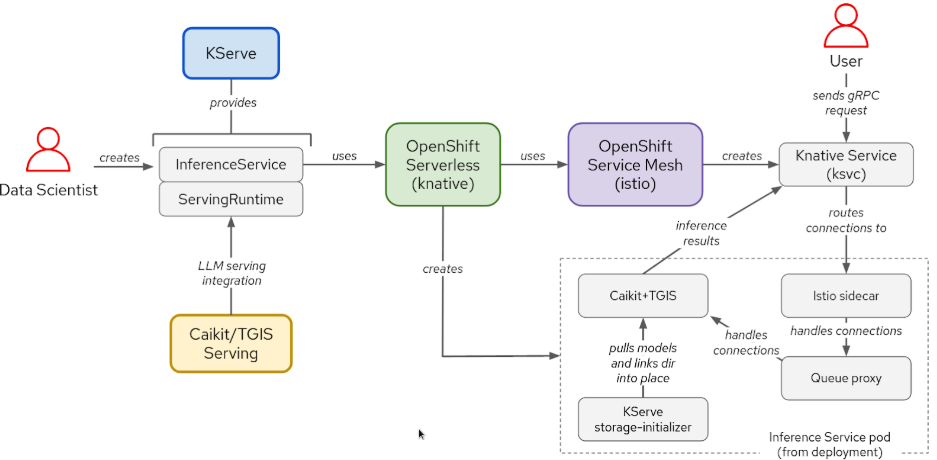

---
## Exercise: Deploy a validated model on Red Hat OpenShift AI
You will now deploy a validated model form the Red Hat Validated Model Repository on Hugging Face to Red Hat OpenShift AI. 

1. Click **Data science projects** in the Explorer.
2. Type **vllm-demo** in the *Filter* text box.  

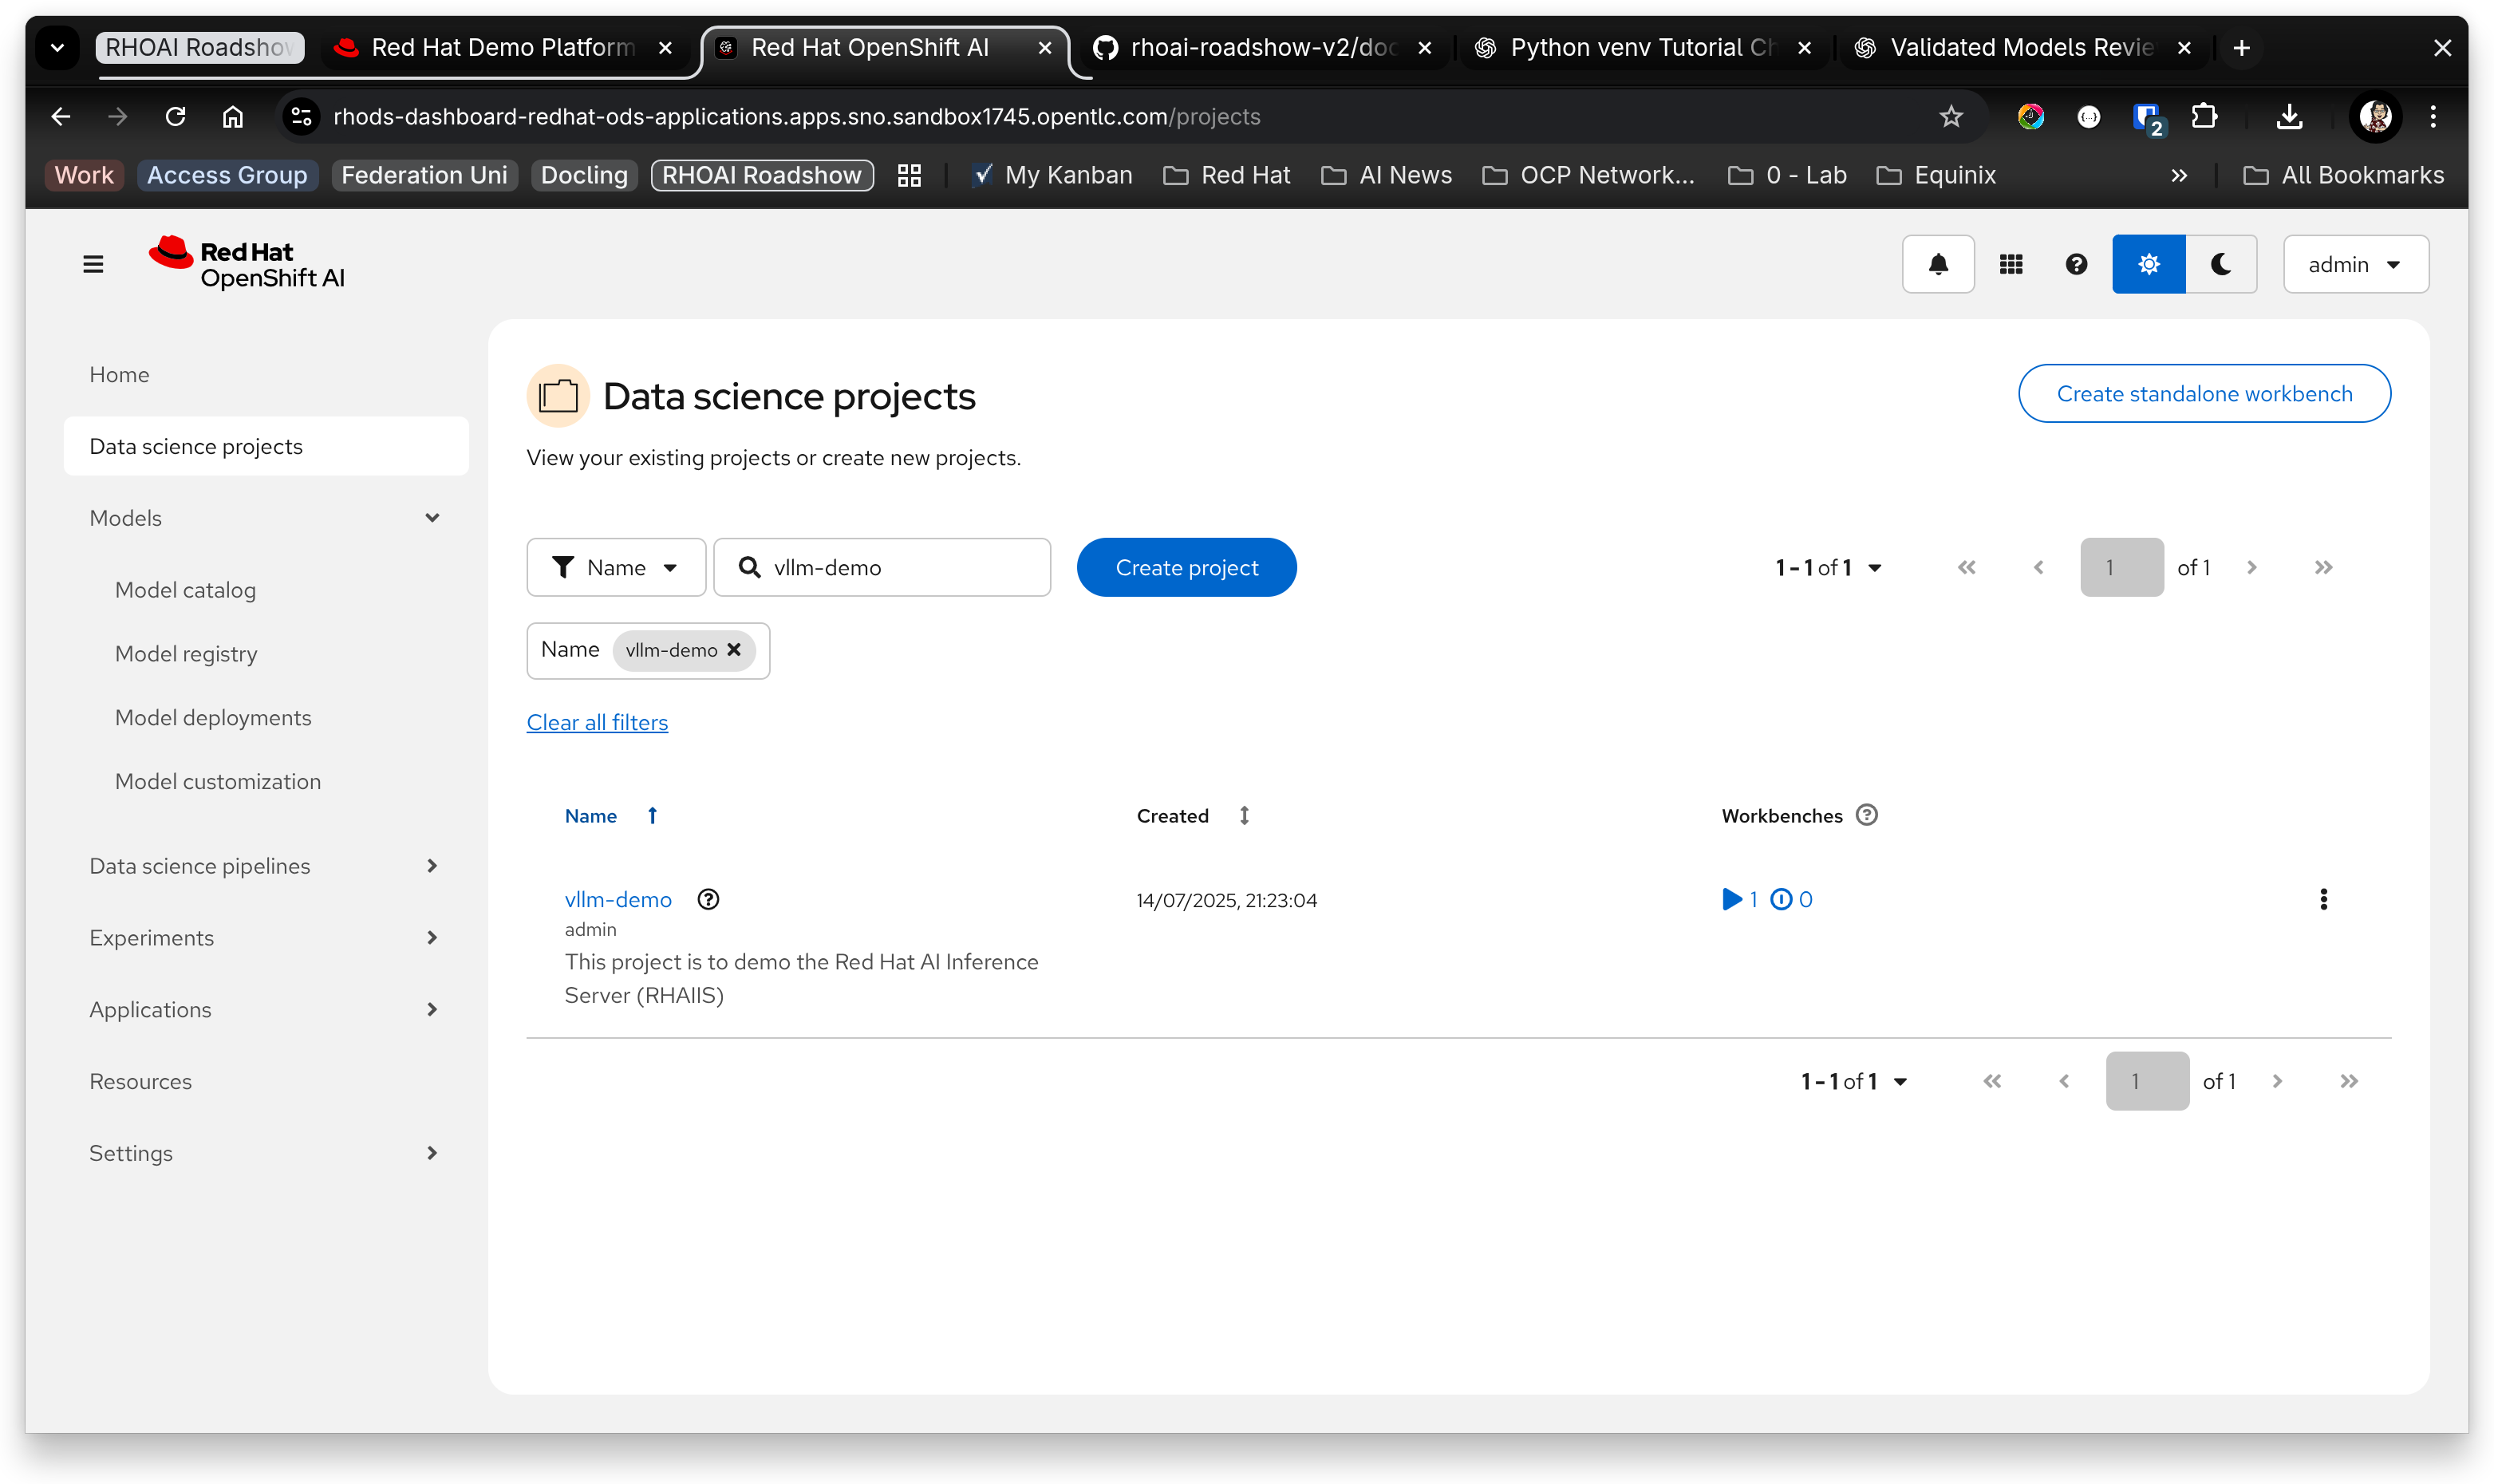

3. Click the **`vllm-demo`** project.  
   OpenShift AI opens the project and displays the project overview screen.

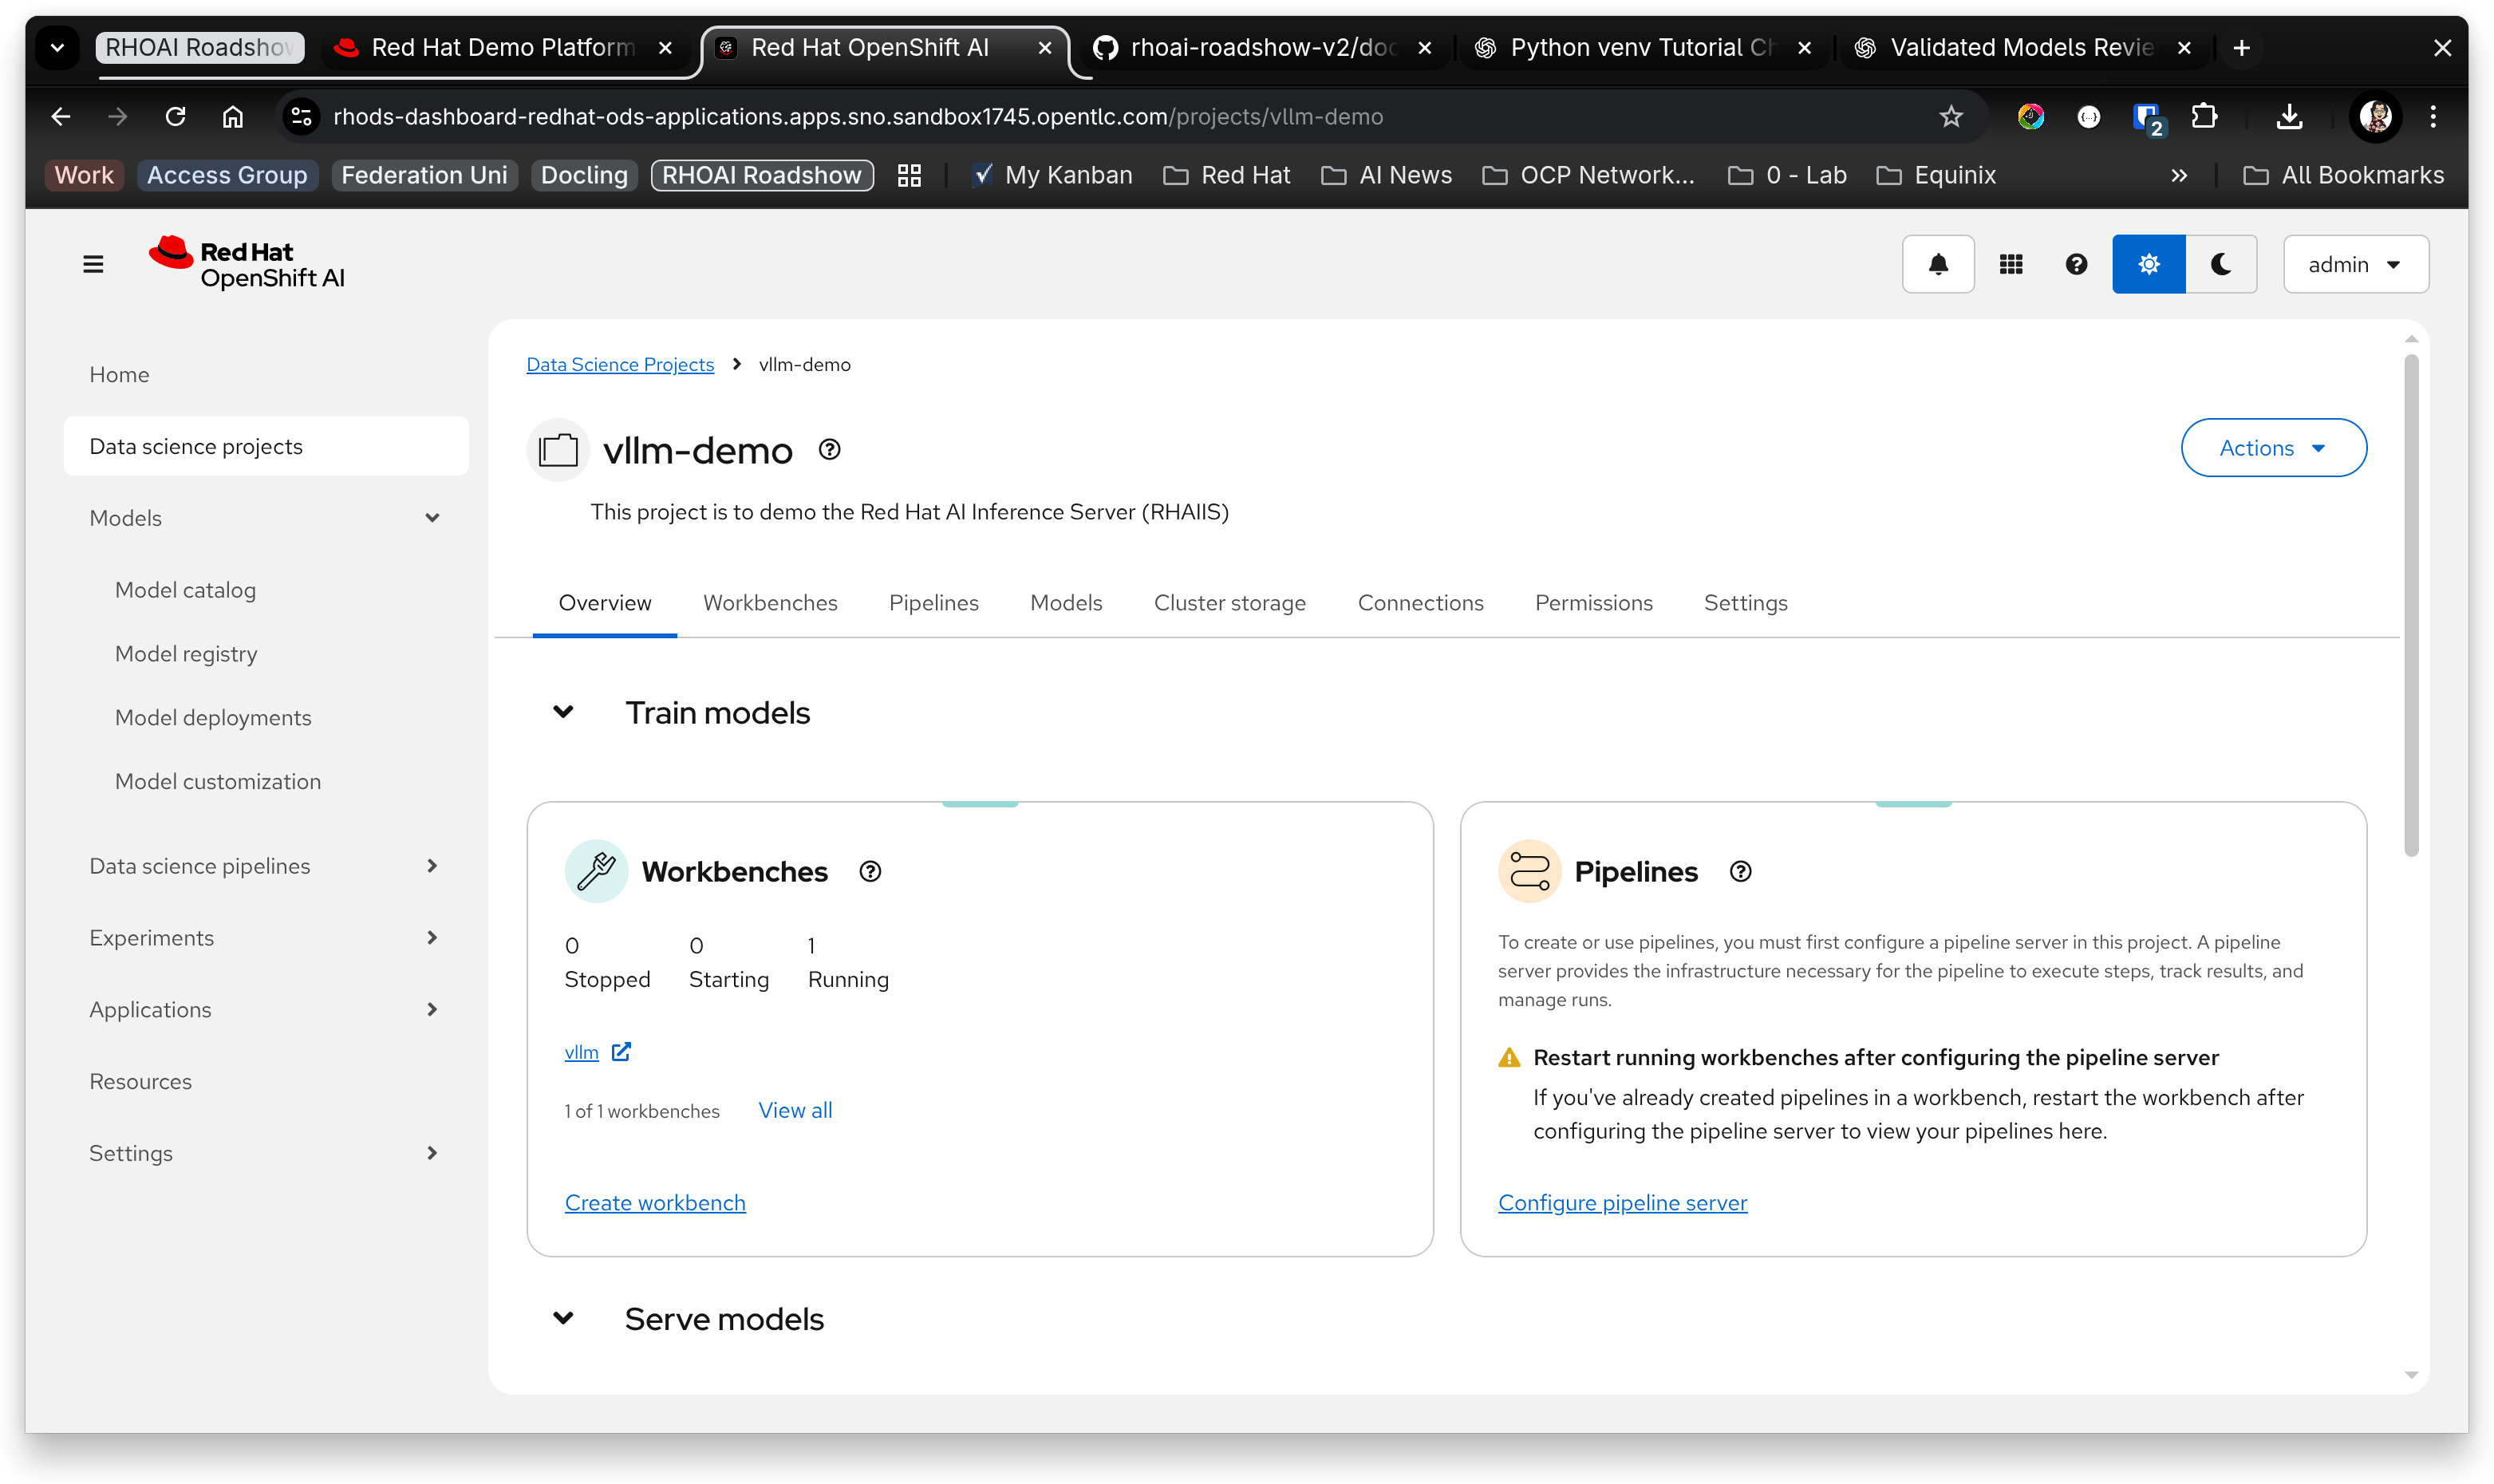

3. Click **Models** in the *project toolbar*.

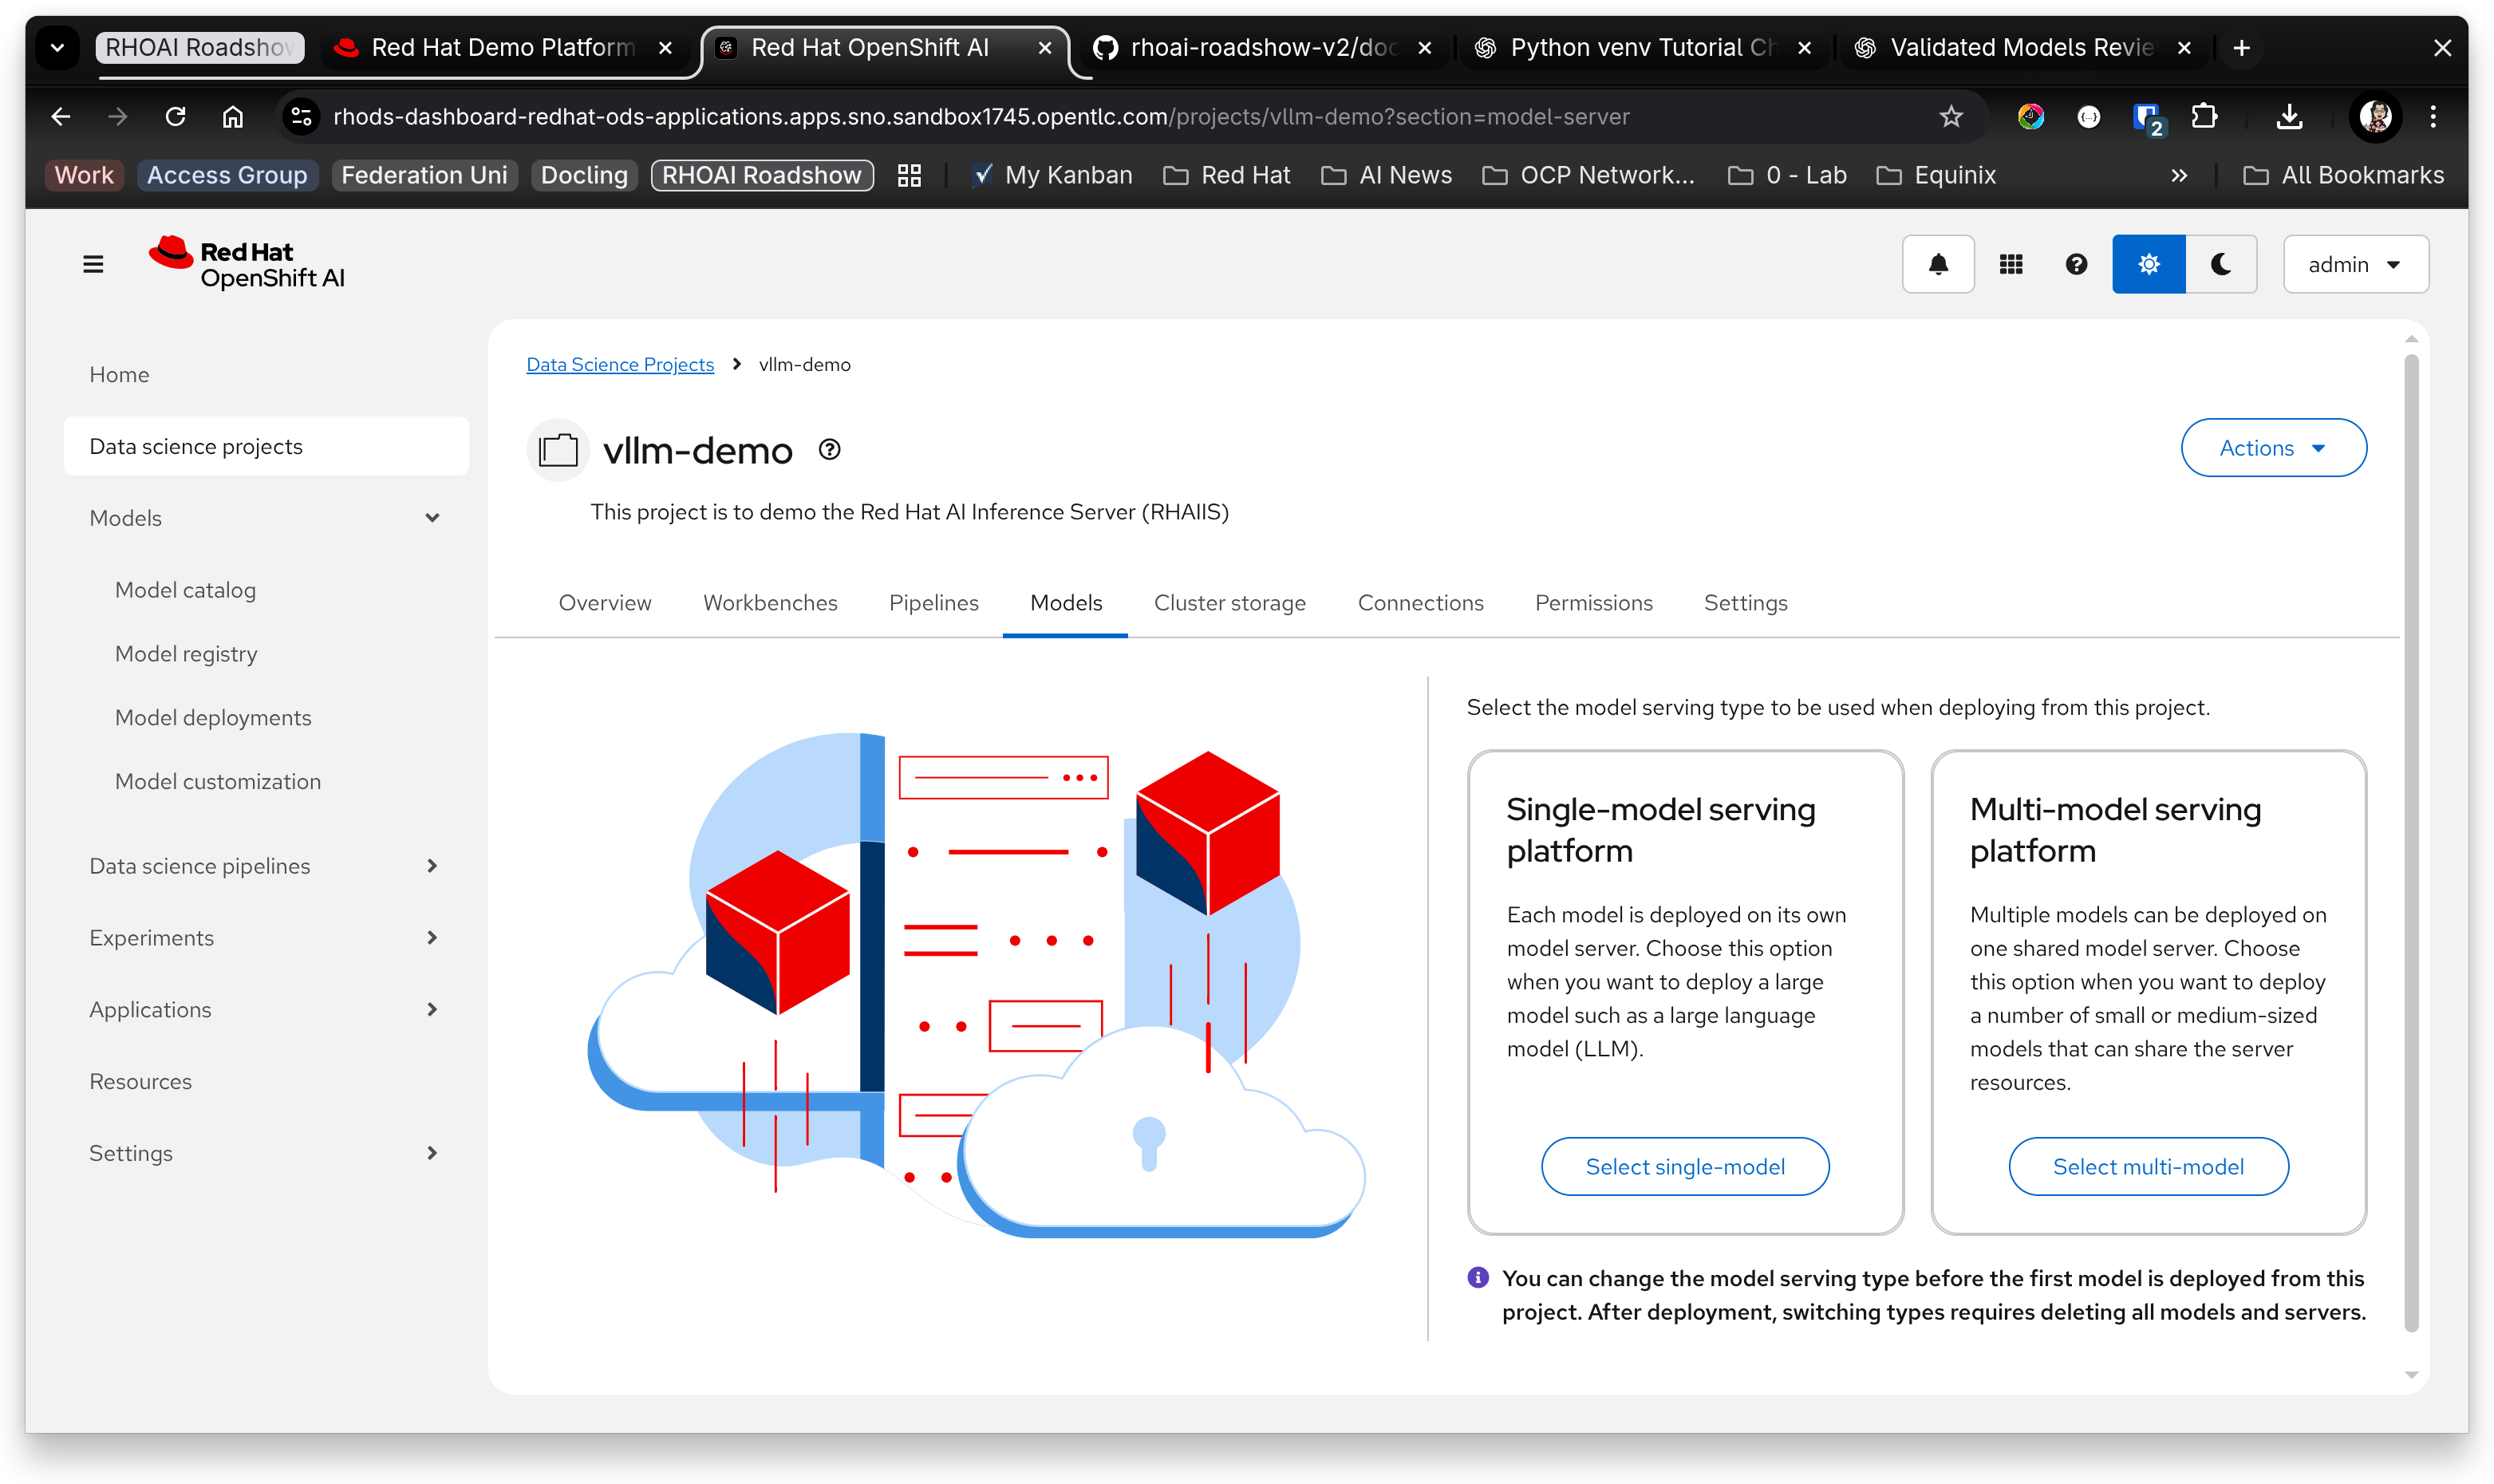


4. Click **Select single model** in the *Single-model serving platform* tile.  
   OpenShift AI displays a list of existing model deployments (there are none currently).

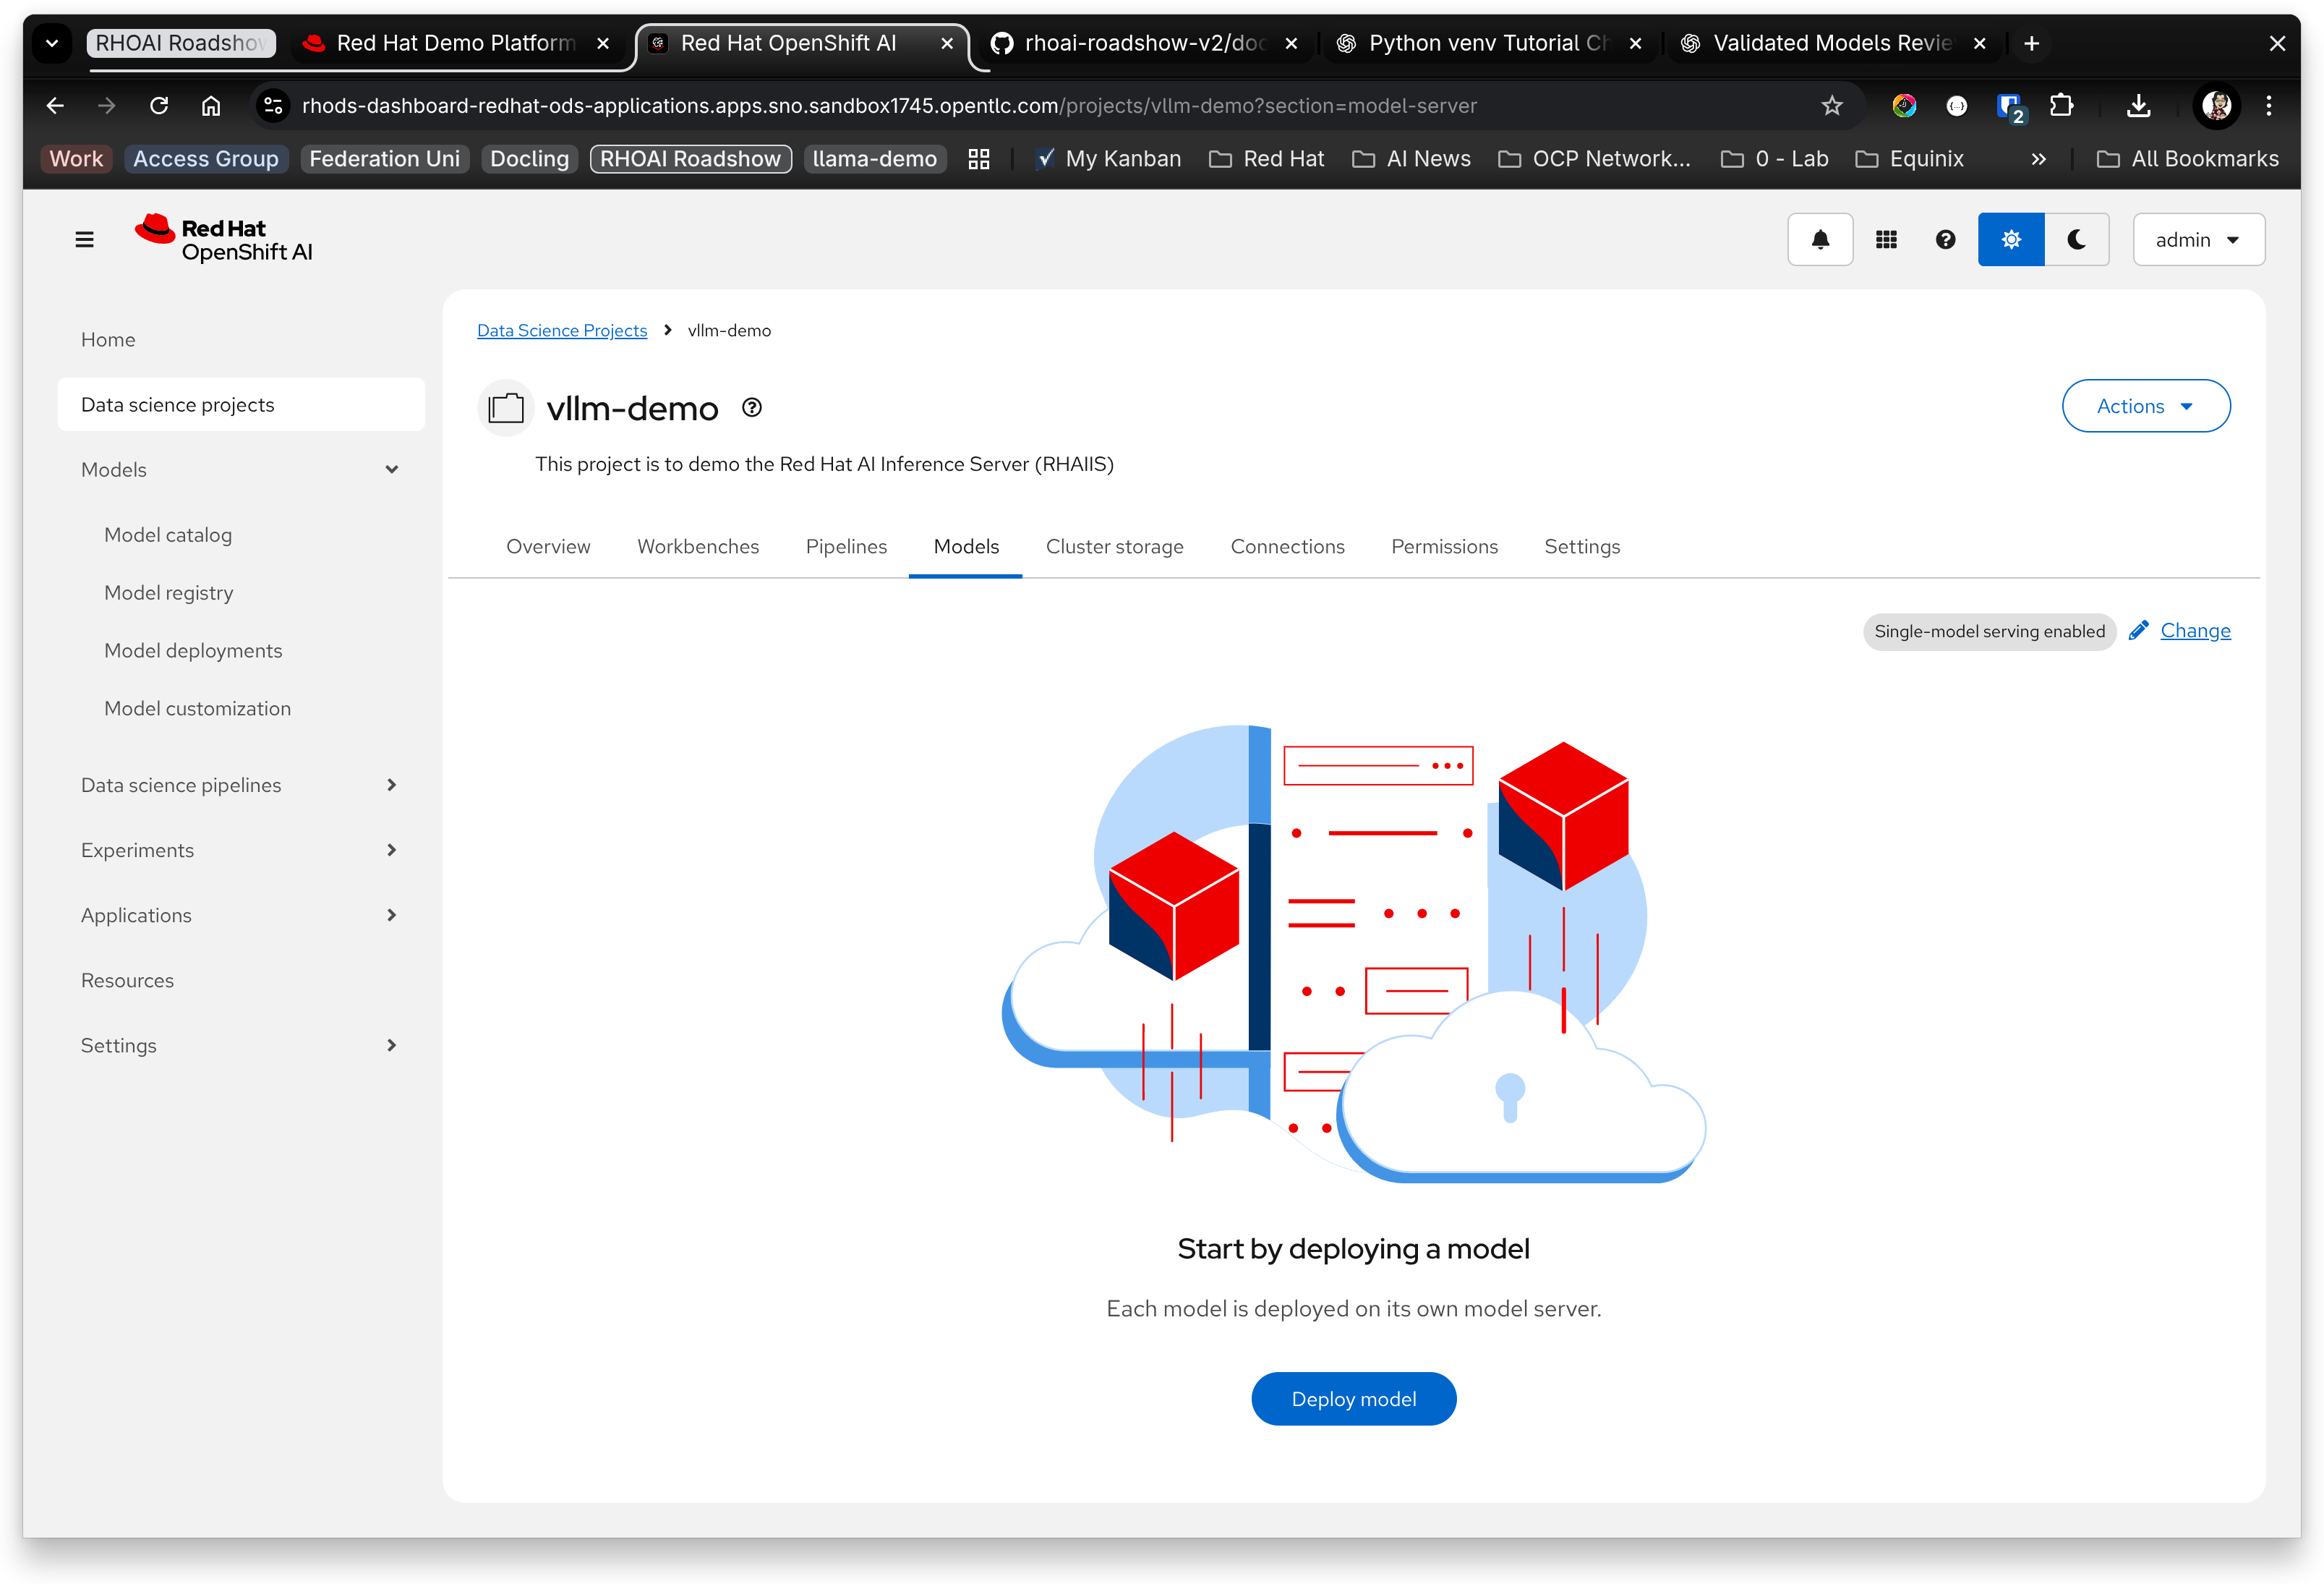

5. Click **Deploy model**  
   OpenShift AI prompts you to complete the deployment details.

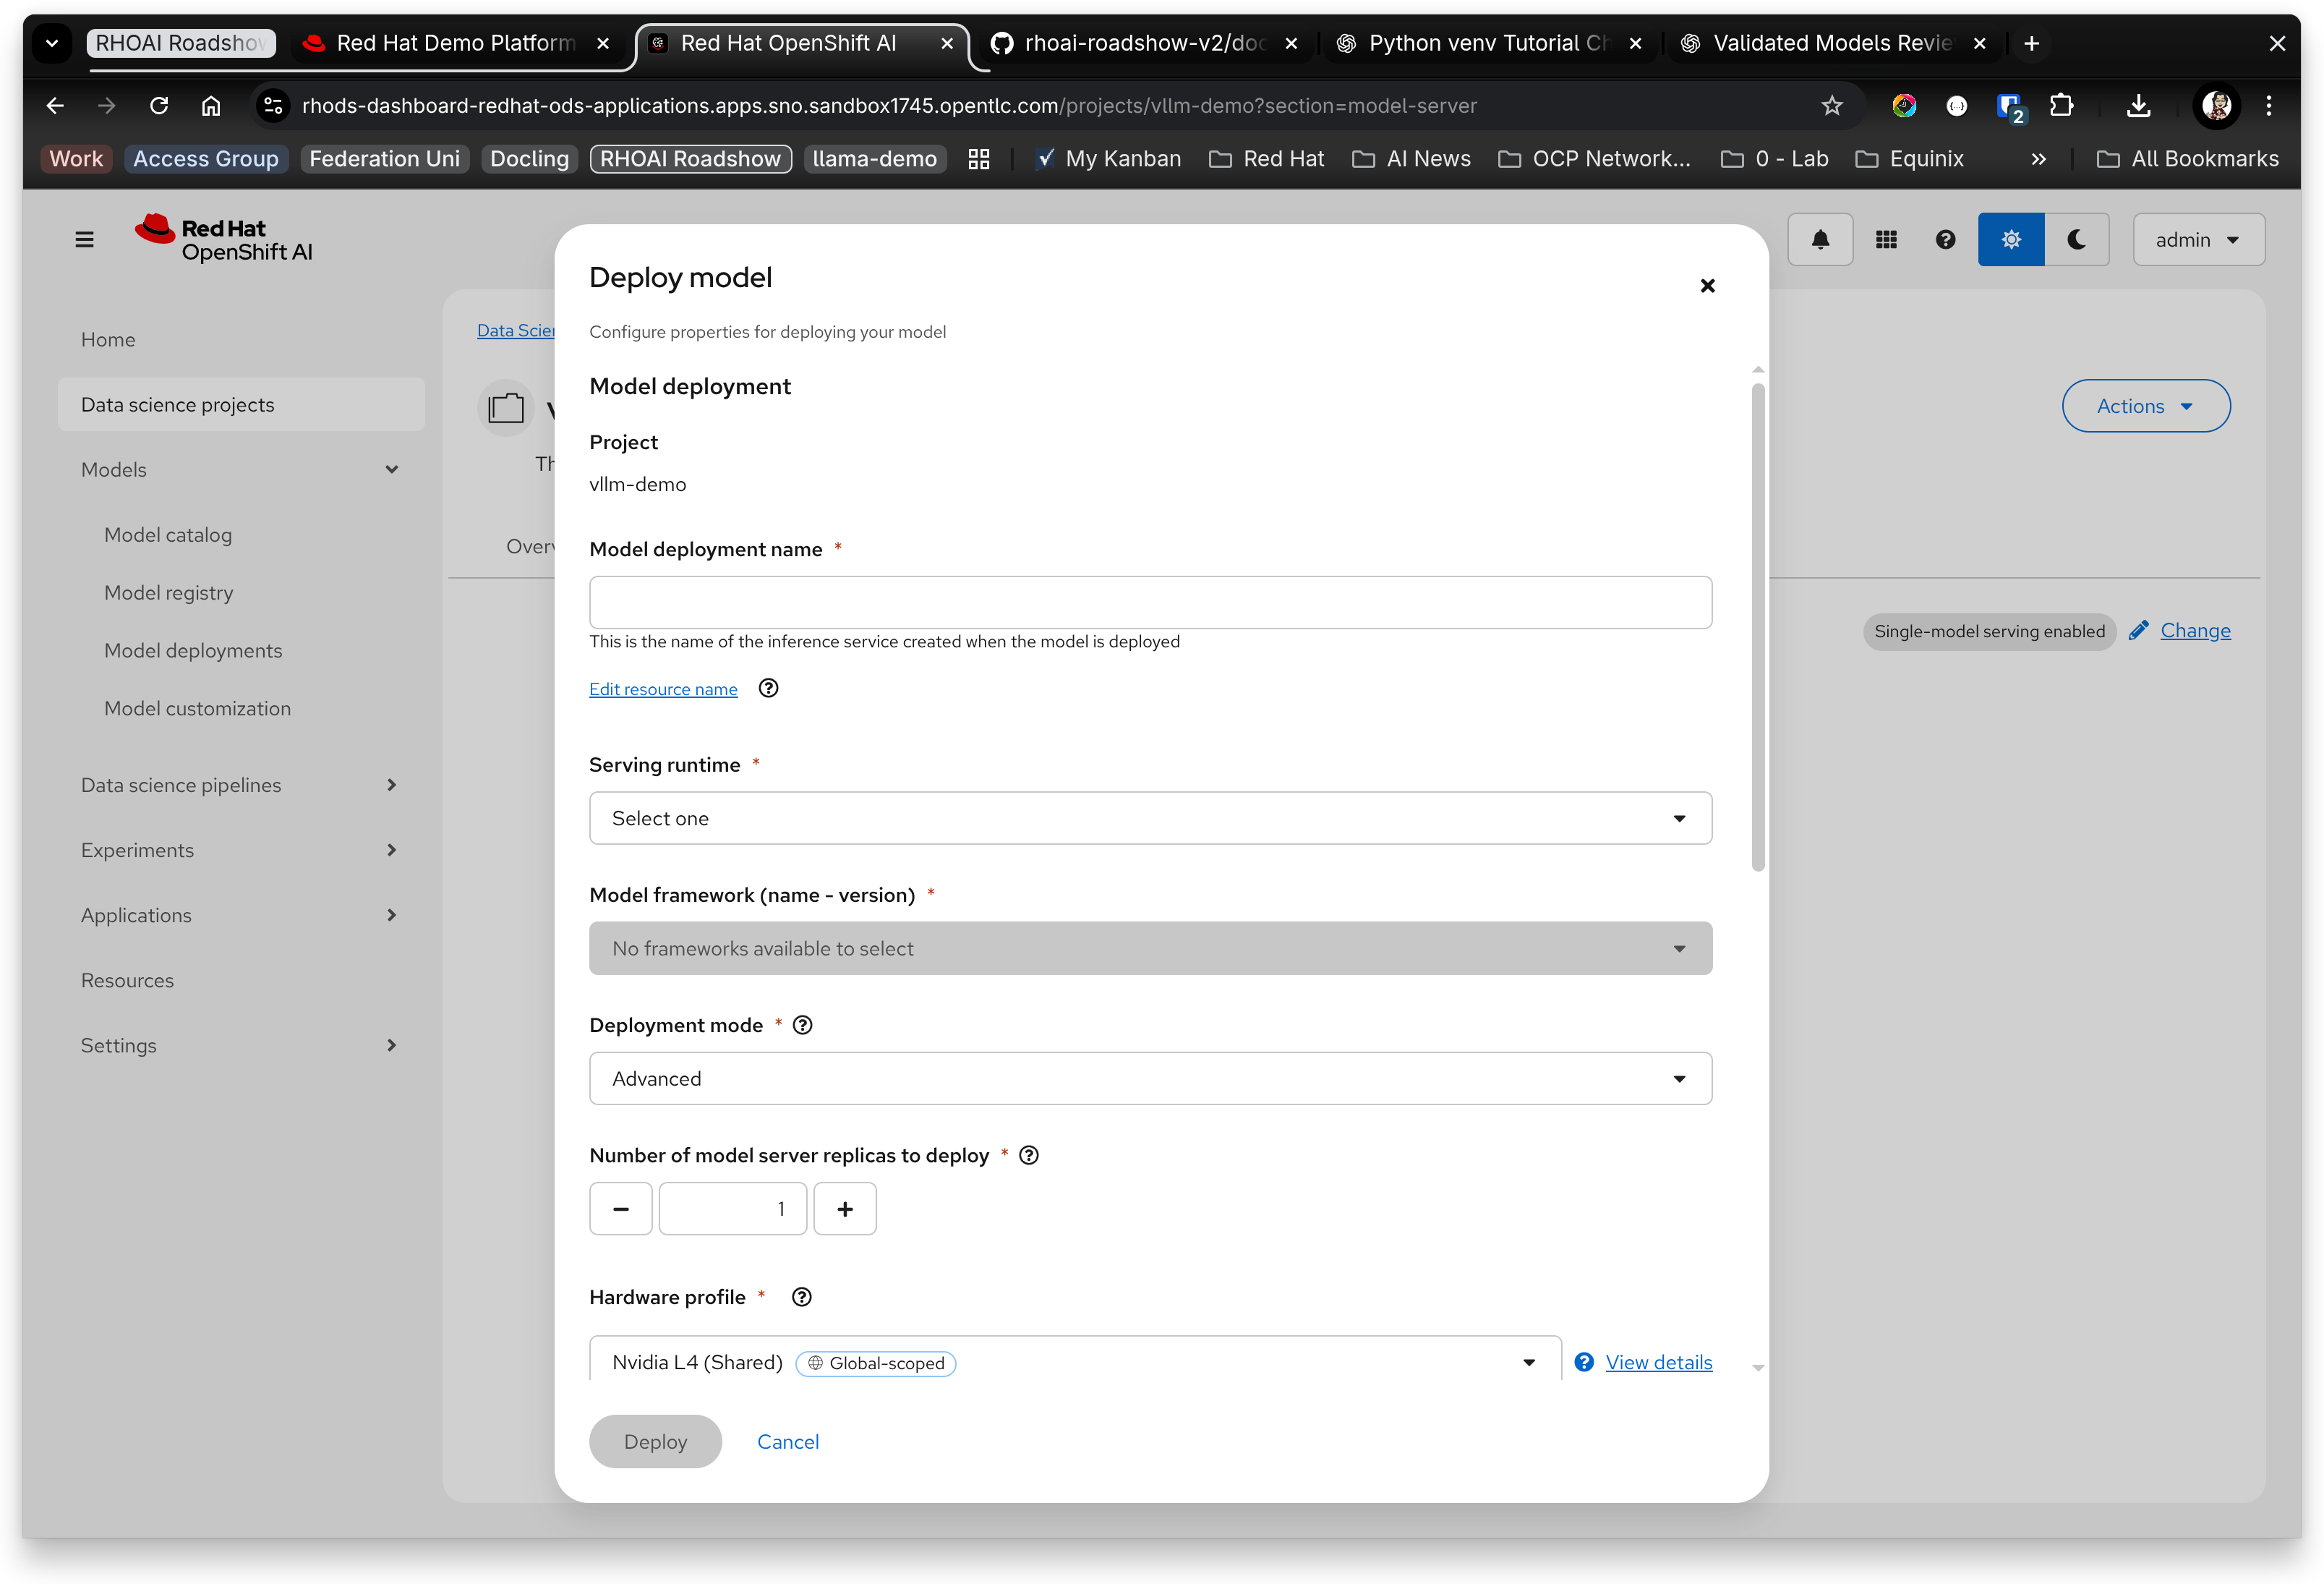

6. Enter the following information into the *Deployment Details* form:
- **Model deployment name:** `granite-3.1-2b-instruct`  
 ⚠️ **Note:** The model has to be on the ModelCar catalog at https://github.com/redhat-ai-services/modelcar-catalog
- **Serving runtime:** `vLLM NVIDIA GPU ServingRuntime for KServe`
- **Demployment mode**: Advanced
- **Number of model server replicas to deploy:** 1
- **Hardware profile:** Nvidia L4 (Shared)
- **Model route::Make deployed models available through an external route:** checked
- **Model route::Require token authencation:** unchecked
- **Connection type:** `URI - v1`
- **Connection name:** `granite-3.1-2b-instruct`
- **URI:** `oci://quay.io/redhat-ai-services/modelcar-catalog:granite-3.1-2b-instruct`

7. Review the form details are correct.
8. Click **Deploy**
   OpenShift AI downloads the model from the Red Hat public repository and proceeds to deploy it on your cluster.
   

9. Wait until the Status turns to ✅.

   **⚠️The deployment process can take up to 10 mins to complete for the first time.**  

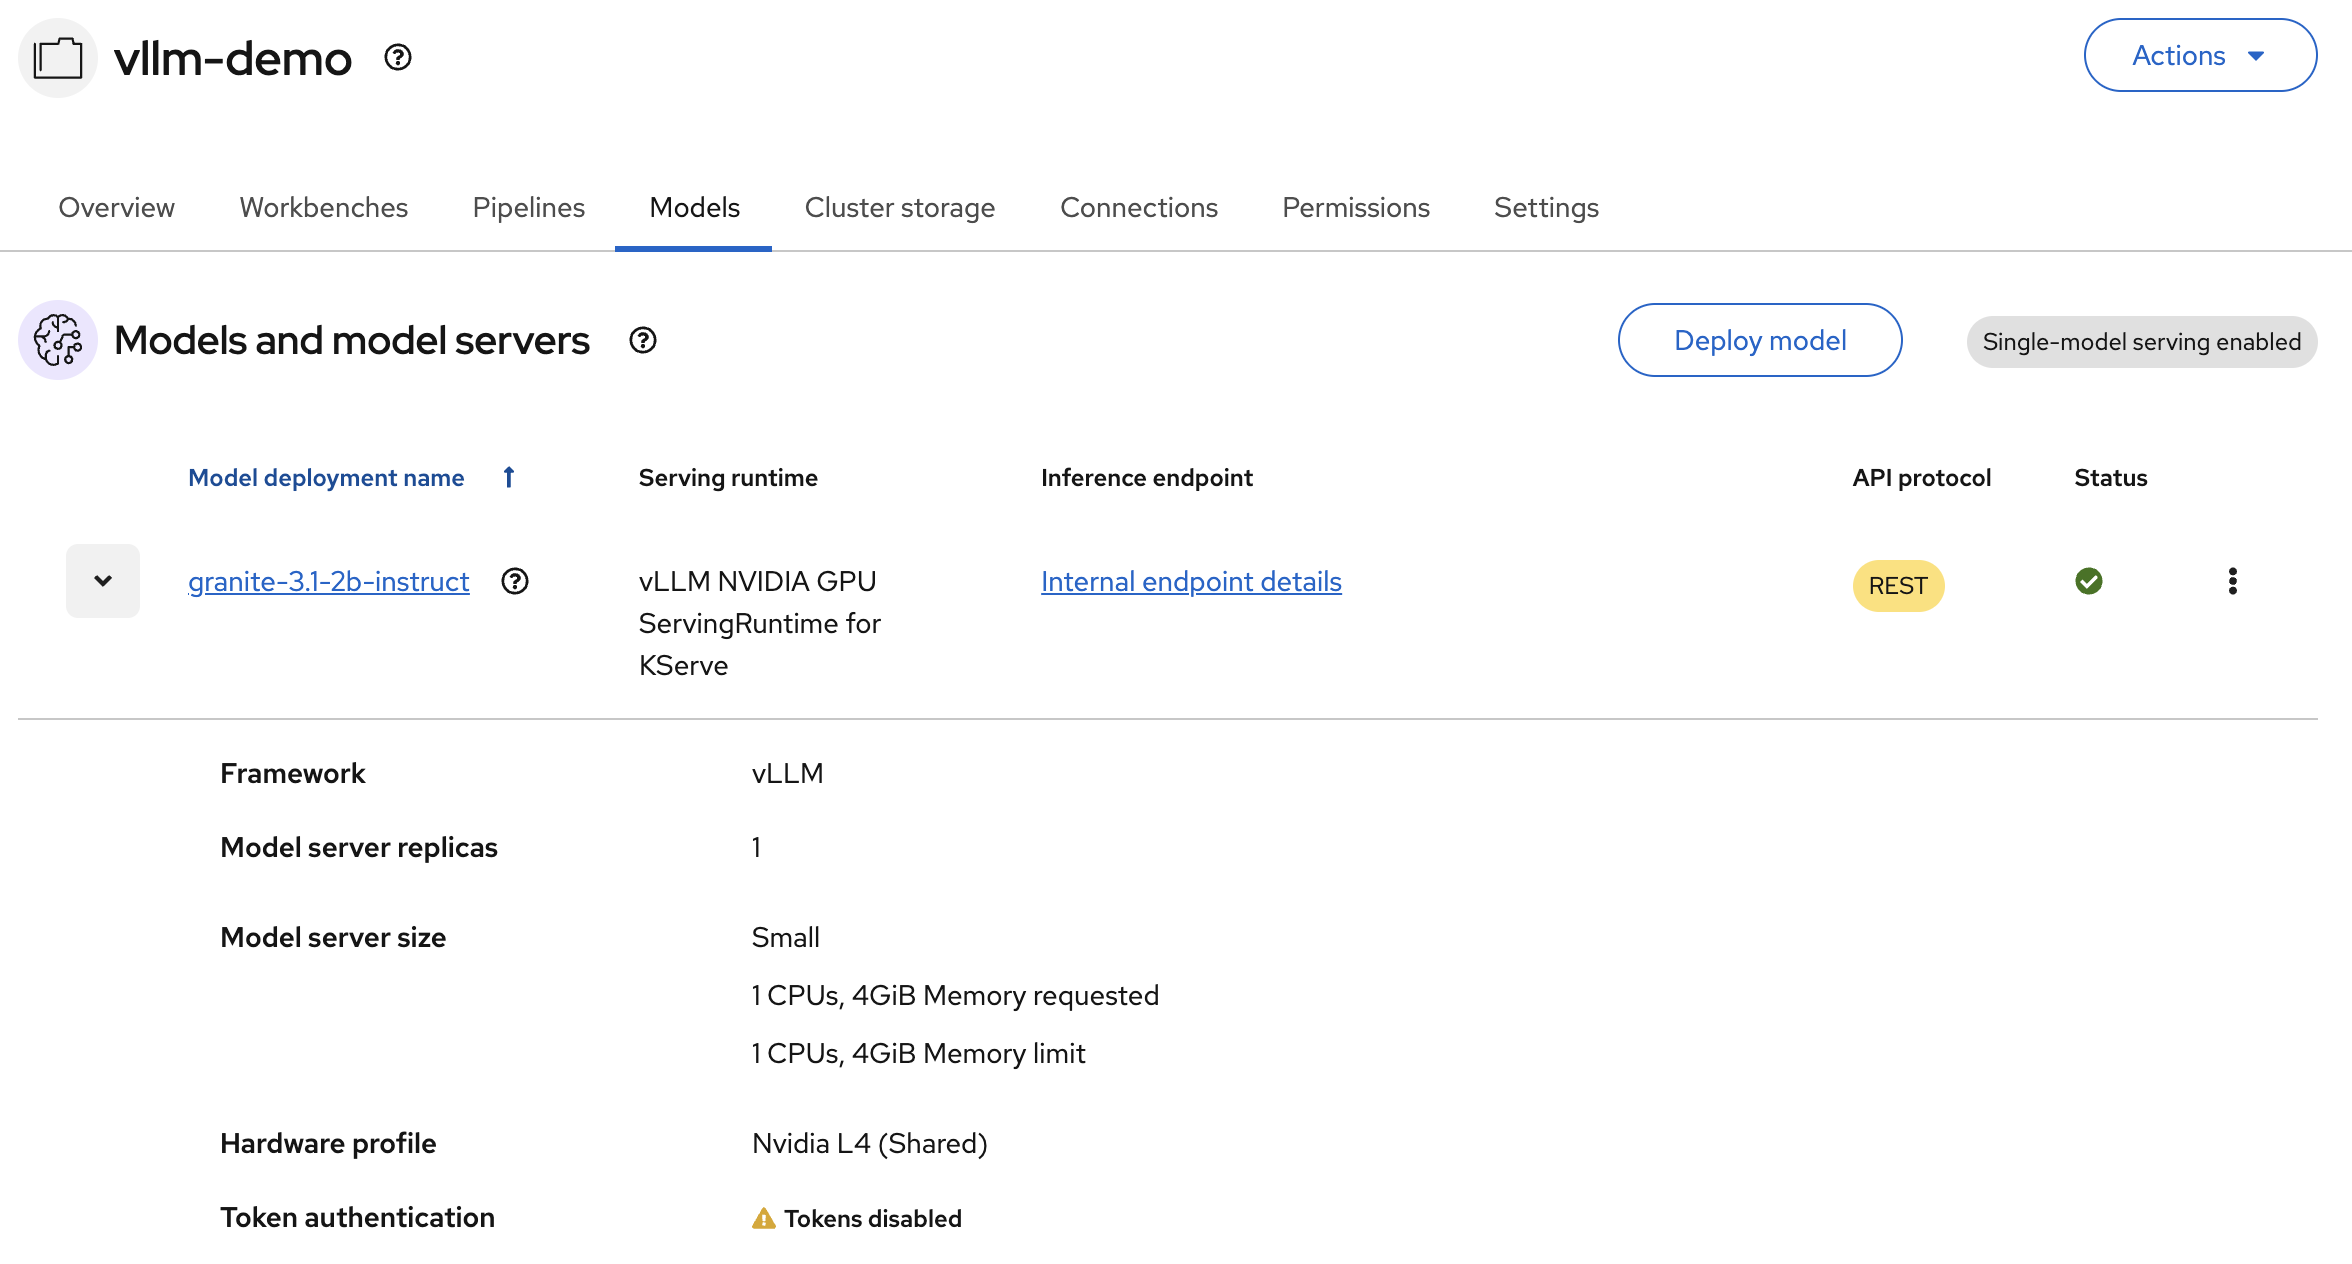

## 💡 Simplifying model deployments with the OpenSHift AI Model Catalog

OpenShift AI provides an integrated model catalog that contains all of the Red Hat validated models on Hugging Face. This catalog removes the need to search Hugging Face and simplifies obtaining trusted and validated models.

We have made this even easier by introducing **📚 Model Catalog** and **🗃️ Model Registry**.

### 📚Model Catalog
The Model Catalog serves as a centralised repository where data scientists can discover, register, and manage ML models.  
The catalog contents are both Red Hat validated models as well as common and popular third-party models that Red Hat has verified toe provinance.

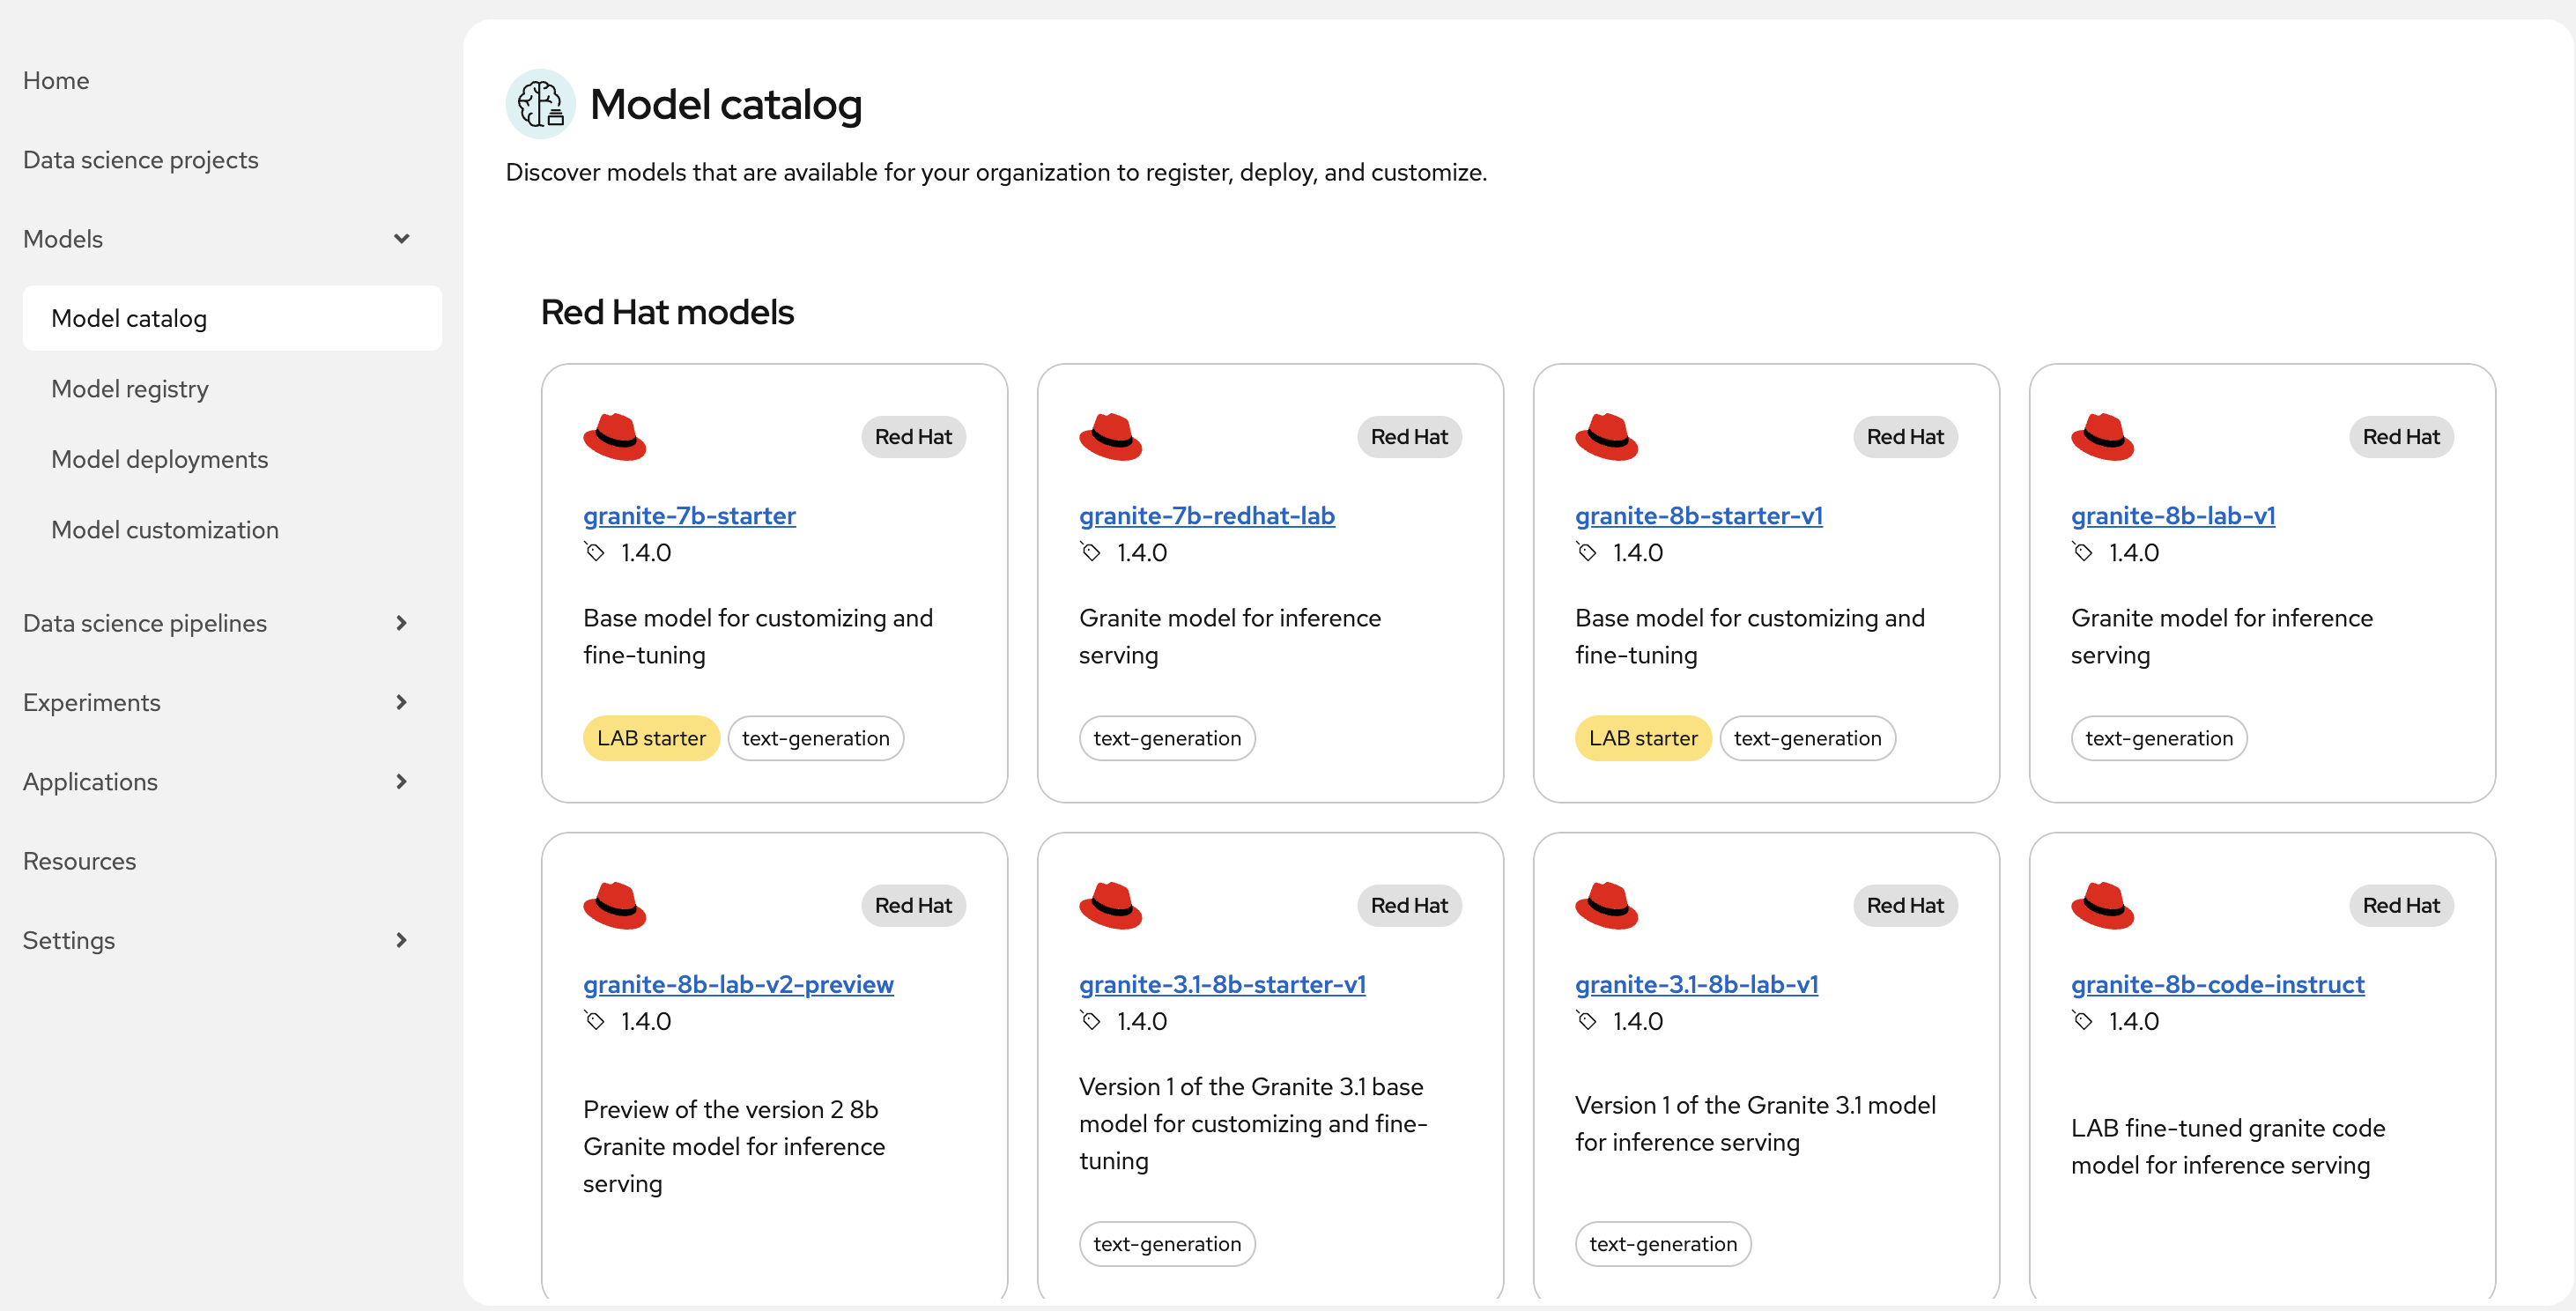  

### 🗃️ Model Registry
The Model Registry acts as the backend storage system for ML models, offering structured management and version control.  

### Exercise: Deploy a model from the OpenShift AI Model Catalog

In this activity you will dpeloy a model from the *Model Catalog.*

1. Click **Models > Model catalog** in the OpenShift AI Explorer panel
   OpenShift AI displays the *Model Catalog.*
2. Click the **Llama-3.1-8B-Instruct-quantized.w4a16** model tile.
   OpenShift AI displays the model details page.

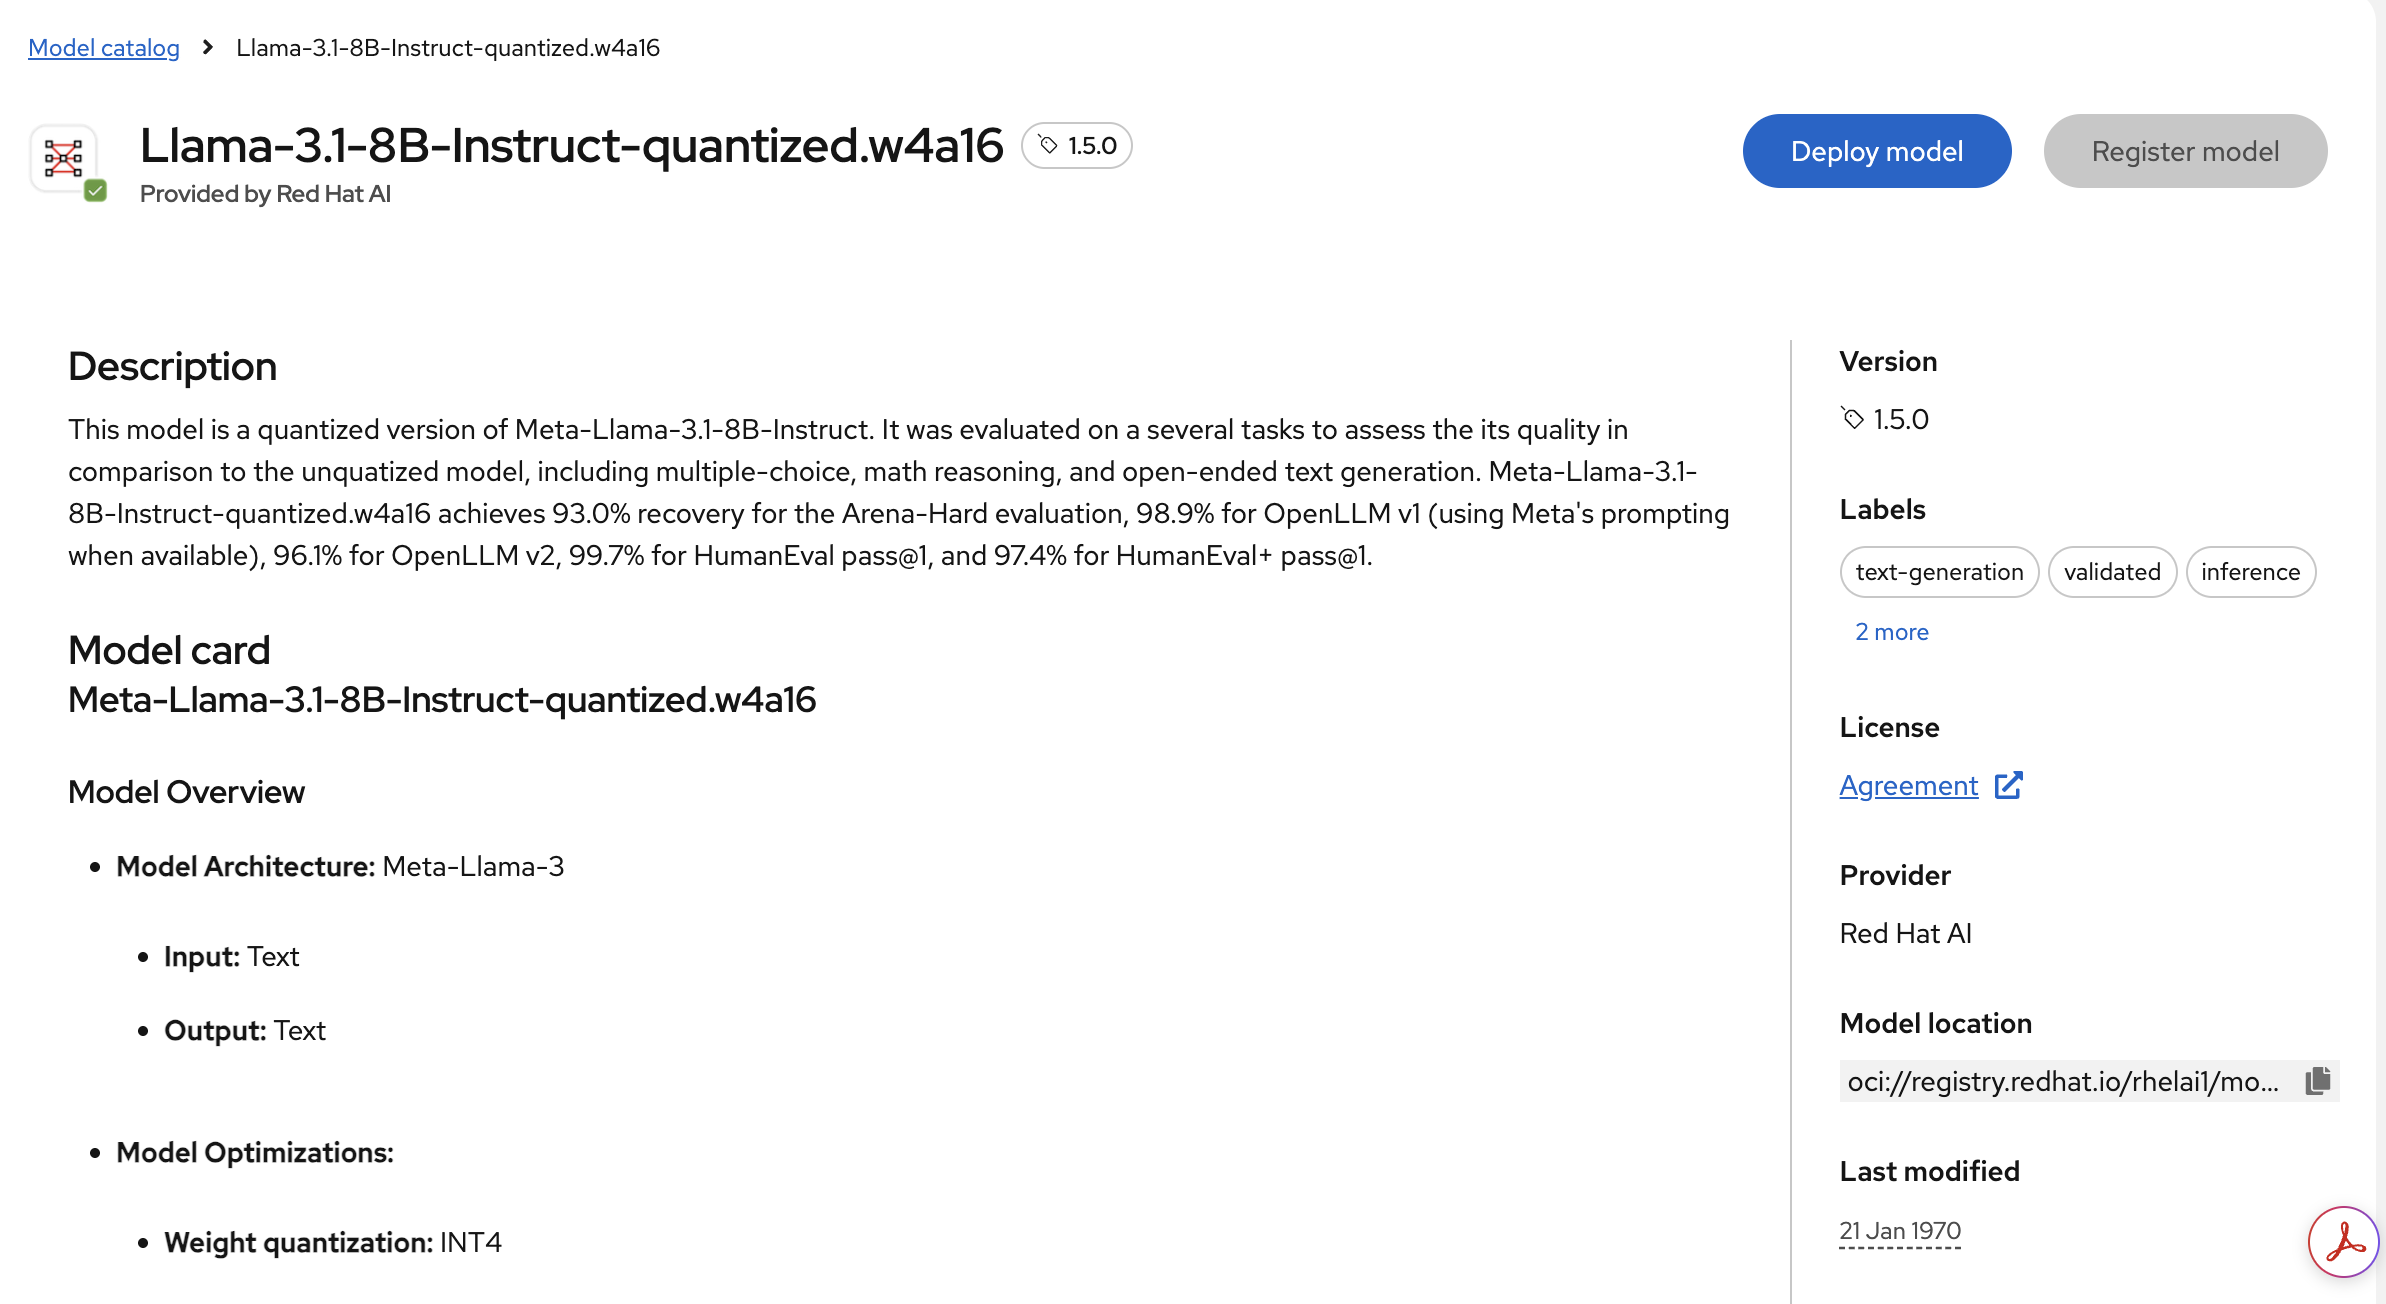

3. Click the `Deploy Model` button  
   OpenShift AI prompts to select the project to deploy the model into.  
4. Click the **Project** drop-down list box.  
   OpenShift AI displays a list of all projects.  
5. Type **vllm** in the *list-box search* text box and press **Enter.**  
   OpenShift AI displays the *vllm-demo* project.  

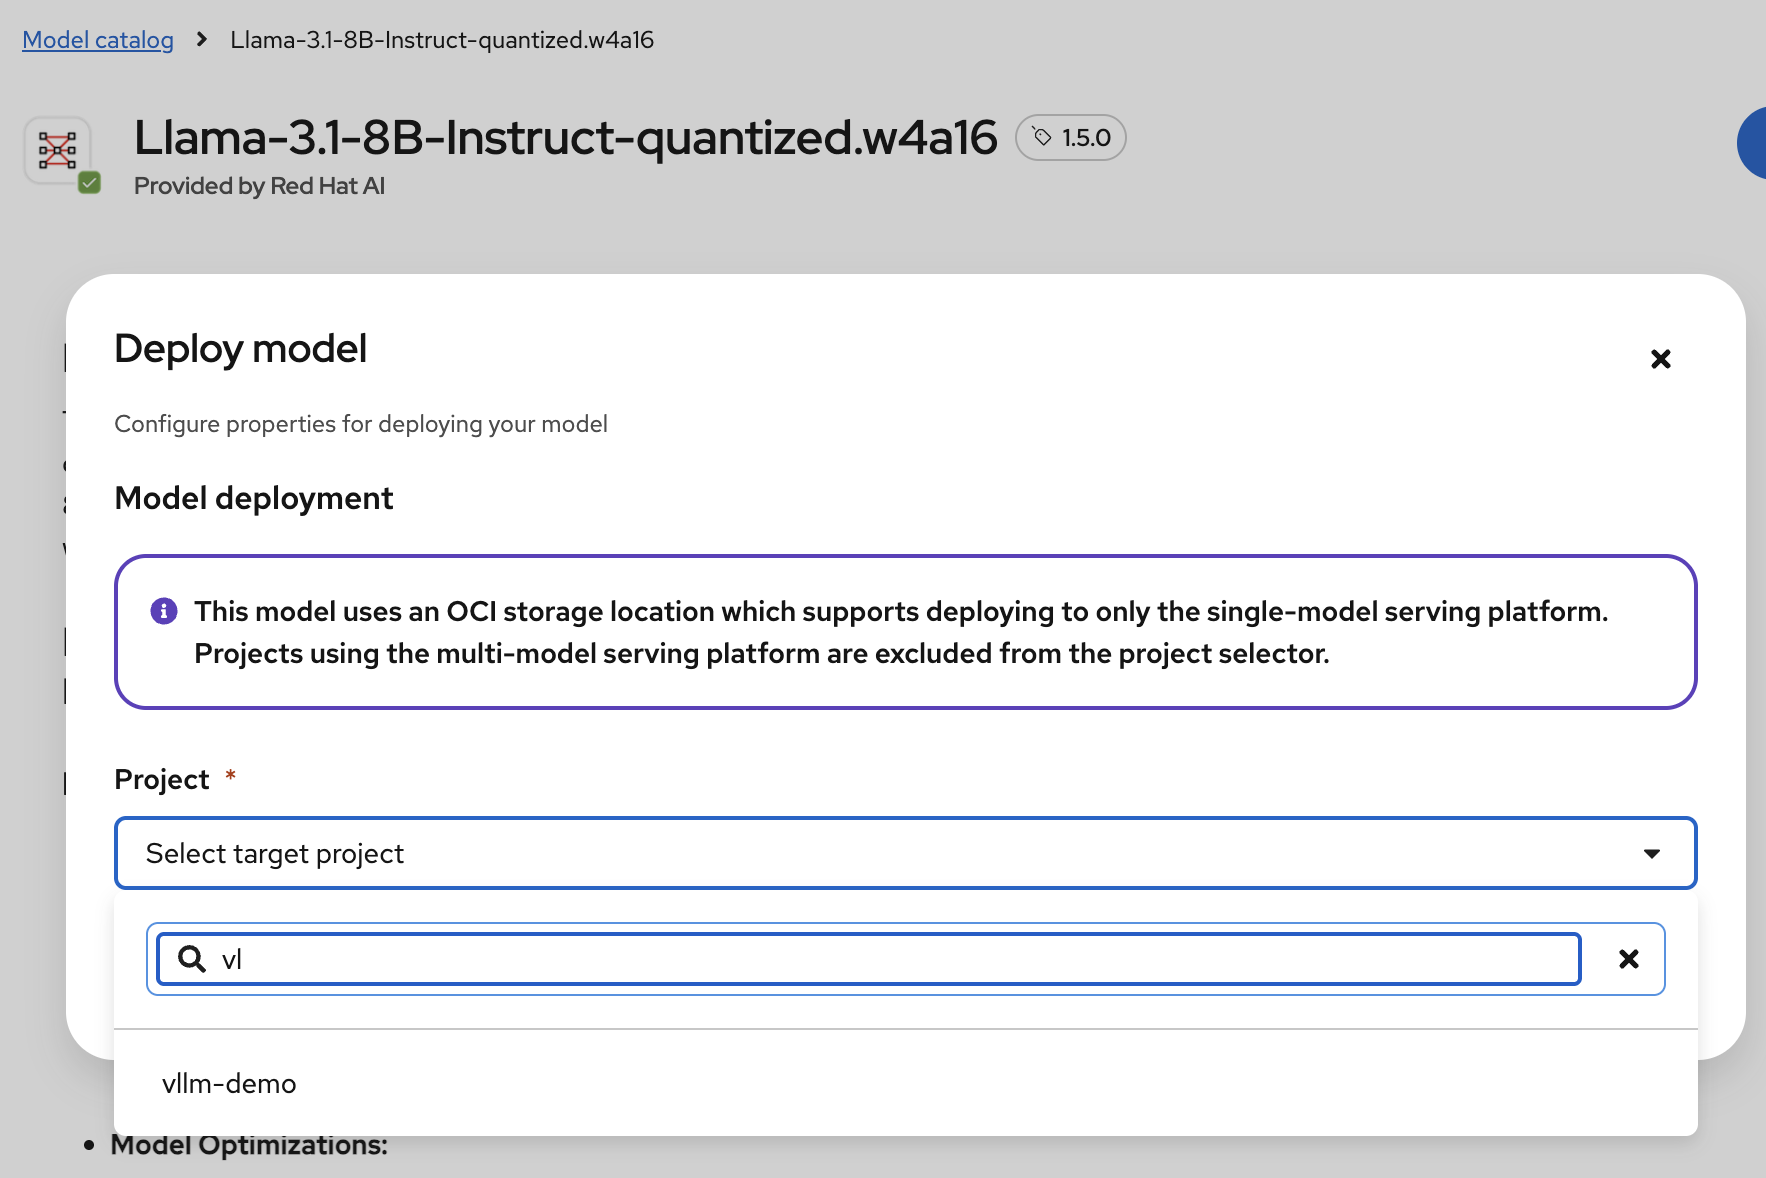

6. Click **vllm-demo**  
   OpenShift AI displays the *model deployment* form.  
7. Enter the following details while leaving all other values as their defaults:  
   - **Serving runtime:** vLLM NVIDIA GPU ServingRuntime for KServe  

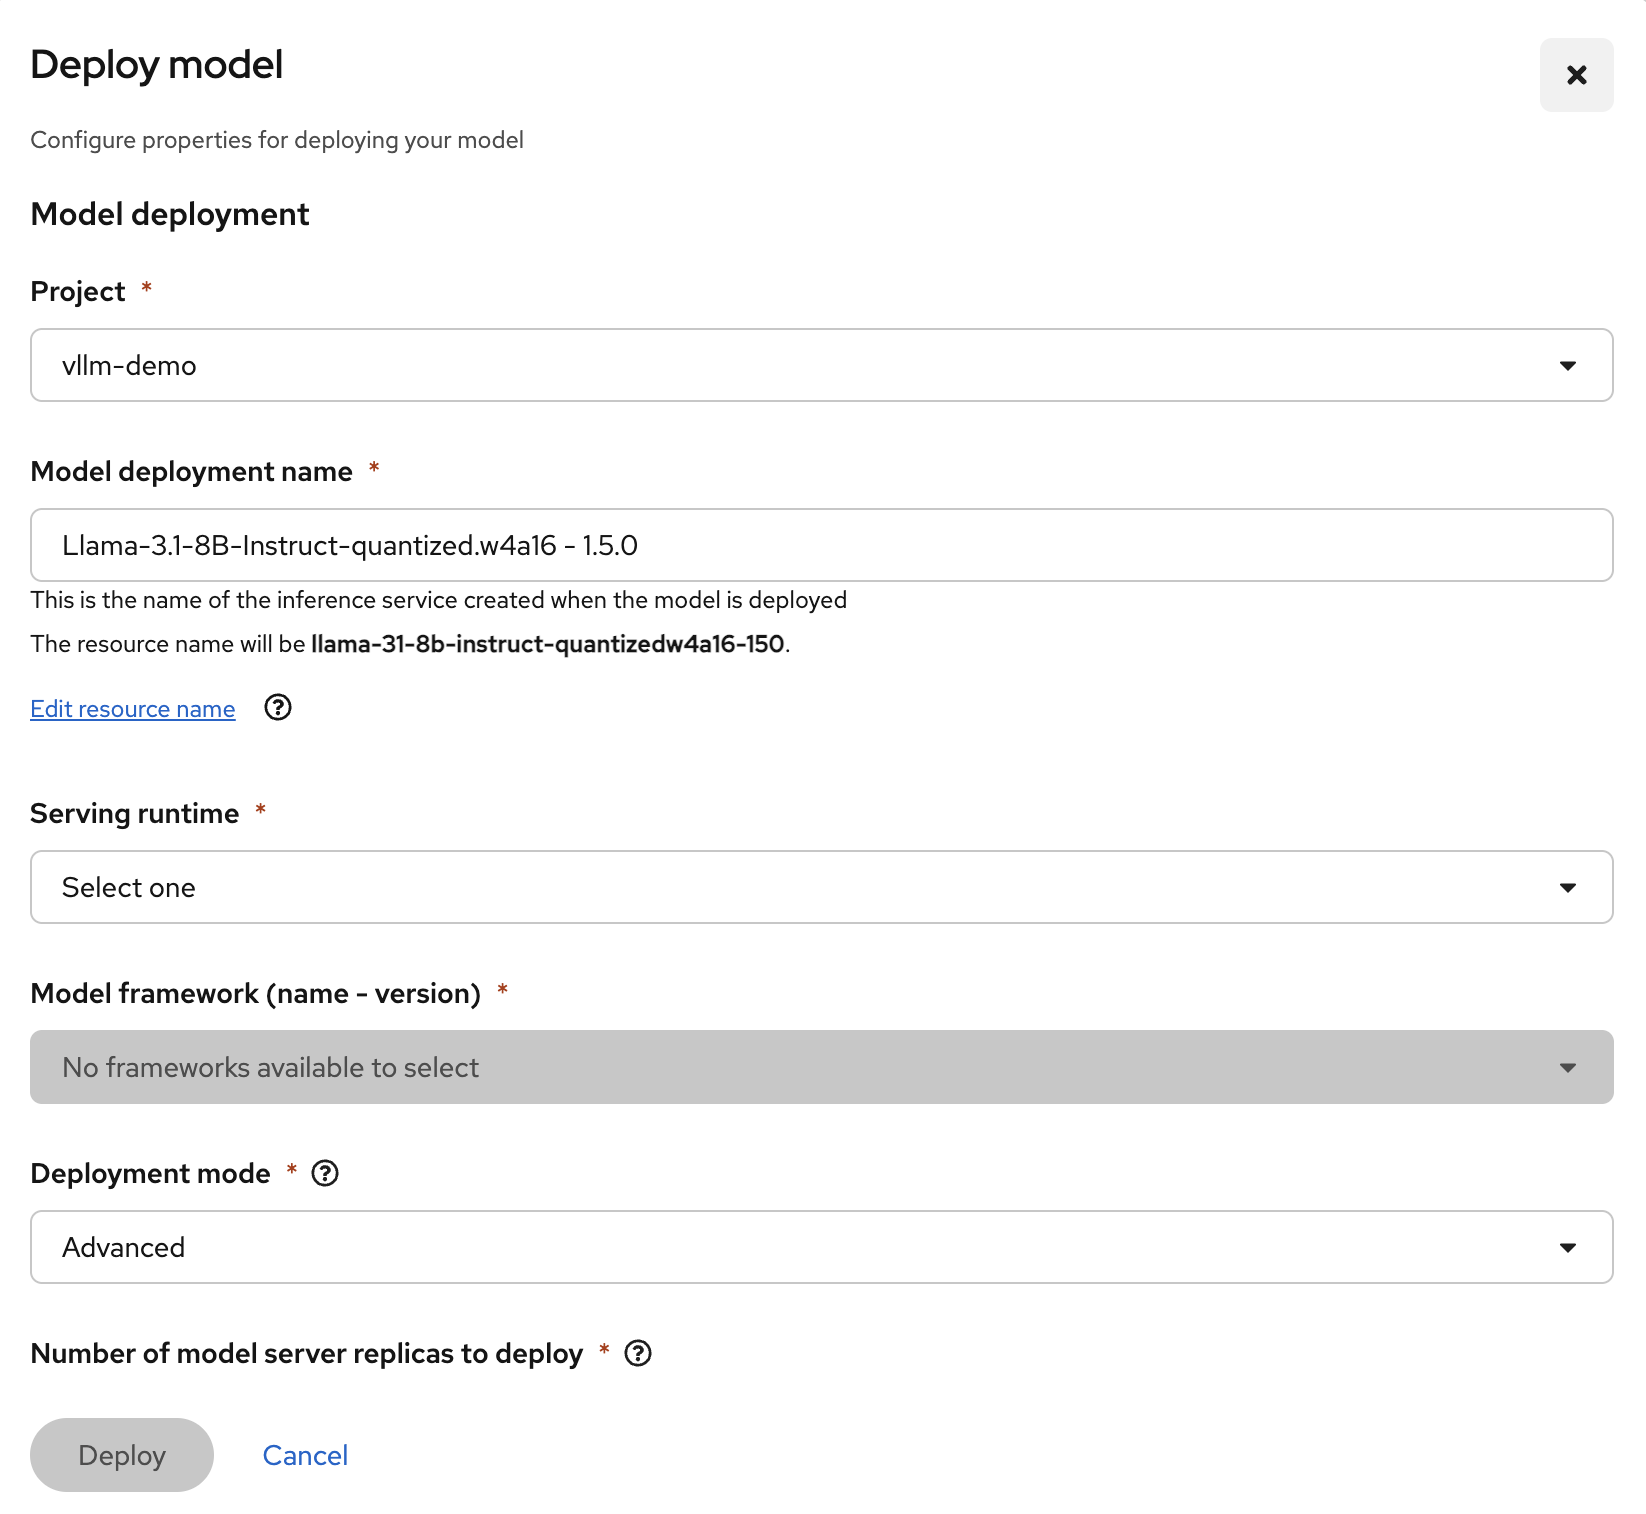

 8. Click the **Deploy** button.
   OpenShift AI deploys the model

---
This is the end of Lab 3 - Validated models.